# Wikipedia Notable Life Expectancies
## [Notebook 10: Exploratory Data Analysis](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_EDA_thanak_2022_09_30.ipynb)
### Context

The
### Objective

The
### Data Dictionary
- **day**: Reported day of month of death
- **name**: Name of individual
- **info**: Original Wikipedia information fields for the individual from Wikipedia Notable Deaths' List page ("age, country of citizenship at birth, subsequent country of citizenship (if applicable), reason for notability, and cause of death (if known)"
- **link**: Link to the individual's page
- **num_references**: Number of references on the individual's page (a proxy for notability)
- **year**: Reported year of death
- **month**: Reported month of death
- **info_parenth**: Additional information for individual that was extracted from info because it was in parentheses
- **age**: Reported age in integer years at death*
- **cause_of_death**: Reported cause of death
- **place_1**: Country of citizenship at birth
- **place_2**: Subsequent country of citizenship (if applicable)
- **known for** categories: 0 (No) or 1 (Yes) value if individual's reported known-for role(s) is within the category. Mutliple categories are possible.† 
        - sciences
        - social
        - spiritual
        - academia_humanities
        - business_farming
        - arts
        - sports
        - law_enf_military_operator 
        - politics_govt_law
        - crime
        - event_record_other
        - other_species
- **num_categories**: Total **num_categories** for individual

    \* For age reported in a two-value estimated range, **age** reflects the arithmetic mean.  Reported estimated values of a single number reflect that number, while estimates covering a decade (e.g., 80's) were converted to the middle of the decade (i.e., 85).  The vast majority of entries for **age** reflect the single integer value that was reported.  
    
    † See Appendix A for further category definitions and decision-making regarding role categorization.

### Importing Libraries

In [1]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
import sqlite3 as sql

# To save/open python objects in pickle file
import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To split dataset into train and test sets
from sklearn.model_selection import train_test_split

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 211)

# To set some dataframe visualization attributes
pd.set_option("max_colwidth", 150)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
# import warnings

# warnings.filterwarnings("ignore")

# To set some plot visualization attributes
sns.set_theme()
sns.set(font_scale=1.4)
sns.set_palette(
    (
        "midnightblue",
        "goldenrod",
        "maroon",
        "darkolivegreen",
        "cadetblue",
        "tab:purple",
        "yellowgreen",
    )
)
# plt.rc("font", size=12)
# plt.rc("axes", titlesize=15)
# plt.rc("axes", labelsize=14)
# plt.rc("xtick", labelsize=13)
# plt.rc("ytick", labelsize=13)
# plt.rc("legend", fontsize=13)
# plt.rc("legend", fontsize=14)
# plt.rc("figure", titlesize=16)

# To play auditory cue when cell has executed, has warning, or has error and set chime theme
import chime

chime.theme("zelda")

<IPython.core.display.Javascript object>

## Data Overview

### [Reading](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_clean8.db), Sampling, and Checking Data Shape

In [2]:
# Reading the dataset
conn = sql.connect("wp_life_expect_clean8.db")
data_initial = pd.read_sql("SELECT * FROM wp_life_expect_clean8", conn)

# Making a working copy
df = data_initial.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 98038 rows and 25 columns.


,day,name,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
0,1,William Chappell,", 86, British dancer, ballet designer and director.",https://en.wikipedia.org/wiki/William_Chappell_(dancer),21,1994,January,None,86.000,None,United Kingdom of Great Britain and Northern Ireland,None,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,Raymond Crotty,", 68, Irish economist, writer, and academic.",https://en.wikipedia.org/wiki/Raymond_Crotty,12,1994,January,None,68.000,None,Ireland,None,0,0,0,1,0,1,0,0,1,0,0,0,3


<IPython.core.display.Javascript object>

In [3]:
# Checking last 2 rows of the data
df.tail(2)

,day,name,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
98036,9,Aamir Liaquat Hussain,", 50, Pakistani journalist and politician, MNA .",https://en.wikipedia.org/wiki/Aamir_Liaquat_Hussain,99,2022,June,"2002 2007, since 2018",50.000,None,Pakistan,None,0,0,0,0,0,1,0,0,1,0,0,0,2
98037,9,Zou Jing,", 86, Chinese engineer, member of the Chinese Academy of Engineering.",https://en.wikipedia.org/wiki/Zou_Jing_(engineer),3,2022,June,None,86.000,None,"China, People's Republic of",None,1,0,0,0,0,0,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [4]:
# Checking a sample of the data
df.sample(5)

,day,name,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
10616,19,Josef Herman,", 89, Polish-British painter.",https://en.wikipedia.org/wiki/Josef_Herman,12,2000,February,None,89.000,None,Poland,United Kingdom of Great Britain and Northern Ireland,0,0,0,0,0,1,0,0,0,0,0,0,1
69941,18,Carlos Aldunate Lyon,", 102, Chilean Jesuit priest, master of novices and writer.",https://en.wikipedia.org/wiki/Carlos_Aldunate_Lyon,7,2018,July,Pope Francis,102.000,None,Chile,None,0,0,1,0,0,1,0,0,0,0,0,0,2
6199,21,Jean Horsley,", 84, New Zealand artist.",https://en.wikipedia.org/wiki/Jean_Horsley,15,1997,August,None,84.000,None,New Zealand,None,0,0,0,0,0,1,0,0,0,0,0,0,1
94930,31,Joe Comuzzi,", 88, Canadian politician, MP .",https://en.wikipedia.org/wiki/Joe_Comuzzi,14,2021,December,1988 2008,88.000,None,Canada,None,0,0,0,0,0,0,0,0,1,0,0,0,1
89059,9,Mahesh Joshi,", 82, Indian politician, Madhya Pradesh MLA .",https://en.wikipedia.org/wiki/Mahesh_Joshi_(Madhya_Pradesh_politician),5,2021,April,"1967 1972, 1980 1990",82.000,None,India,None,0,0,0,0,0,0,0,0,1,0,0,0,1


<IPython.core.display.Javascript object>

#### Observations:
- With our dataset successfully loaded, we will split the dataset into 80% train and 20% test sets, to limit our EDA to the train set.
- Both train and test sets will be exported at the end of this notebook.

### Splitting the Dataset into Train and Test Sets

In [5]:
# Splitting df into train and test
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Making working copy of train set
df = train.copy()

# Checking shape of train and test
print(f"Train set has {train.shape[0]} rows and {train.shape[1]} columns.\n")
print(f"Test set has {test.shape[0]} rows and {test.shape[1]} columns.")

Train set has 78430 rows and 25 columns.

Test set has 19608 rows and 25 columns.


<IPython.core.display.Javascript object>

### Checking Data Types, Duplicates, and Null Values

In [6]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78430 entries, 15564 to 15795
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   day                        78430 non-null  object 
 1   name                       78430 non-null  object 
 2   info                       78430 non-null  object 
 3   link                       78430 non-null  object 
 4   num_references             78430 non-null  int64  
 5   year                       78430 non-null  int64  
 6   month                      78430 non-null  object 
 7   info_parenth               29266 non-null  object 
 8   age                        78430 non-null  float64
 9   cause_of_death             26849 non-null  object 
 10  place_1                    78303 non-null  object 
 11  place_2                    4704 non-null   object 
 12  sciences                   78430 non-null  int64  
 13  social                     78430 non-null 

<IPython.core.display.Javascript object>

In [7]:
# Checking duplicate rows
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [8]:
# Checking for duplicate links
df["link"].duplicated().sum()

0

<IPython.core.display.Javascript object>

In [9]:
# Checking sum of null values by column
df.isnull().sum()

day                              0
name                             0
info                             0
link                             0
num_references                   0
year                             0
month                            0
info_parenth                 49164
age                              0
cause_of_death               51581
place_1                        127
place_2                      73726
sciences                         0
social                           0
spiritual                        0
academia_humanities              0
business_farming                 0
arts                             0
sports                           0
law_enf_military_operator        0
politics_govt_law                0
crime                            0
event_record_other               0
other_species                    0
num_categories                   0
dtype: int64

<IPython.core.display.Javascript object>

In [10]:
# Check percentage of null values by column
df.isnull().sum() / len(df) * 100

day                          0.000
name                         0.000
info                         0.000
link                         0.000
num_references               0.000
year                         0.000
month                        0.000
info_parenth                62.685
age                          0.000
cause_of_death              65.767
place_1                      0.162
place_2                     94.002
sciences                     0.000
social                       0.000
spiritual                    0.000
academia_humanities          0.000
business_farming             0.000
arts                         0.000
sports                       0.000
law_enf_military_operator    0.000
politics_govt_law            0.000
crime                        0.000
event_record_other           0.000
other_species                0.000
num_categories               0.000
dtype: float64

<IPython.core.display.Javascript object>

In [11]:
# Checking number of missing values per row
df.isnull().sum(axis=1).value_counts()

2    34256
3    31083
1    12545
0      473
4       73
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We have 78,430 rows and 25 columns.
- Our target, `age`, has no missing values.  
- As expected, `info_parenth` and `place_2` both have high percentages of missing values.  `cause_of death` also has a very high proportion of missing values, which is not problematic for the current analysis.
- There are 127 missing values (~1.6%) for `place_1`, the handling of which we will need to consider.
- The value counts for missing values per row looks generally consistent with the expected missing values, with the `place_1` missing values being the only concern.
- Since we do not have a date of birth feature, we are not working with age calculated to the day, so we can drop `day`.
- There are no duplicate `link` values in the current dataset, so we can drop the purely nominal `name` column as we are retaining `link`, which we may yet need for referencing specific entries.
- `num_references`, `year` (temporal), `age`, and `num_categories` are all of the appopriate numeric type, either integer or float.
- `month` may be interesting for EDA, but is not anticipated to be useful as a predictor as we do not have date of birth.  We will retain it for now and typecast it from object to category.
- `info`, `link`, `info_parenth`, and `cause_of_death` will be left as object type due to their high unique value counts.  `cause_of_death` is not a focus of this analysis, but this column could be further treated to create broader categories of causes (e.g., grouping all types of cancer) for further analysis.  For now, we will retain it, and we can drop it prior to modeling.  `info` and `info_parenth` we will retain for reference only.
- `place_1` and `place_2` are of object type and we will convert them to category.  After initial EDA, we will extract new features for geographic region to reduce dimensionality of the `place_` information.  We will drop `place_2` values that are dupcliates of `place_1`, as they incorrectly indicate that a relocation took place.
- The `known for` categories are all of integer type, but are boolean in nature.  For their summary statistics, we will typecast them as category, then convert them back to integer for the rest of the analysis.
- For this study, we are only interested in human entries, so we will proceed to drop non-human entries, as well as the entire `other_species` column, which will contain only zeros for the remaining human entries.
- Similarly, we are focused on notability for proactive living rather than being known for an event or circumstance that occurred to the individual.  So, we will drop entries with `event_record_other` as their sole category and also limit the study to individuals who attained age 18 and older.
- We will follow suit for the remaining entries by droppping the `event_record_other` column, thereby retaining only their other `known for` information.

#### Dropping `day` and `name`

In [12]:
# Dropping day and name columns
df.drop(["day", "name"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Dropping `place_2` Values that are Duplicates of `place_1`

In [13]:
# Dropping place_1 values that are duplicates of place_2
index = df[df["place_2"].astype("object") == df["place_1"].astype("object")].index
df.loc[index, "place_2"] = None

<IPython.core.display.Javascript object>

#### Excluding Entries for `other_species`

In [14]:
# Re-assigning df to include only human entries
df = df[df["other_species"] == 0]

# Dropping other_species column as no longer needed
df.drop("other_species", axis=1, inplace=True)

# Checking new shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 78040 rows and 22 columns.


<IPython.core.display.Javascript object>

#### Dropping Entries with `event_record_other` as Sole `known for` Category

In [15]:
# Dropping entries with event_record_other as sole category
index = [
    index
    for index in df[(df["event_record_other"] == 1) & (df["num_categories"] == 1)].index
]
df.drop(index, inplace=True)
df.reset_index(inplace=True, drop=True)

# Checking new shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 77662 rows and 22 columns.


<IPython.core.display.Javascript object>

#### Dropping `event_record_other`

In [16]:
# Dropping event_record_other column
df.drop("event_record_other", axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Excluding Entries Under `age` 18

In [17]:
# Re-assigning df to include only human entries
df = df[df["age"] >= 18]

# Checking new shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 77624 rows and 21 columns.


<IPython.core.display.Javascript object>

#### Typecasting `month`, `place_1`,  `place_2`, and `known for` Categories as Category

In [18]:
# Typecasting place_1 and place_2 as category
cols_to_cast = [
    "month",
    "place_1",
    "place_2",
    "sciences",
    "social",
    "spiritual",
    "academia_humanities",
    "business_farming",
    "arts",
    "sports",
    "law_enf_military_operator",
    "politics_govt_law",
    "crime",
]
df[cols_to_cast] = df[cols_to_cast].astype("category")

<IPython.core.display.Javascript object>

#### Observations:
- With 77,624 adult human entries and 21 remaining columns, we are read to proceed with EDA.

## Exploratory Data Analysis (EDA)

### Summary Statistics of Numerical Features

In [19]:
# Summary statistics of numerica features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_references,77624.000,12.554,21.138,3.000,4.000,7.000,13.000,660.000
year,77624.000,2012.155,7.834,1994.000,2007.000,2014.000,2019.000,2022.000
age,77624.000,76.869,15.830,18.000,69.000,80.000,88.000,122.000
num_categories,77624.000,1.160,0.401,1.000,1.000,1.000,1.000,5.000


<IPython.core.display.Javascript object>

#### Observations:
- Our target, `age`, has a left-skewed distribution with a wide spread, from 18 months to 122 years.  The mean and median are close, at ~77 and 80 years, respectively.
- `num_references` has a wide spread and is highly right skewed, with a mean of ~12.6 and median of 7.  At least 75% of entries have 13 or fewer references, while at least one entry has 660 references.  Recall that the dataset was limited to entries with at least 3 references, consistent with the minimum.
- We see the range of `year` correctly reflects the data that was collected, from 1994 to 2022.
- `num_categories` ranges from 1 to 5, with at least 75% of entries having a single `known for` category.

### Summary Statistics of Categorical and Boolean-like Features

In [20]:
# Summary statistics of non-numerical features
df.describe(include=["object", "category"]).T

,count,unique,top,freq
info,77624,71812,", 87, American baseball player .",38
link,77624,77624,https://en.wikipedia.org/wiki/David_Bartleet,1
month,77624,12,January,7888
info_parenth,29140,13903,", ,",2501
cause_of_death,26344,2643,cancer,3345
place_1,77509,210,United States of America,27725
place_2,4309,148,United States of America,1728
sciences,77624,2,0,70660
social,77624,2,0,76938
spiritual,77624,2,0,74854


<IPython.core.display.Javascript object>

In [21]:
# Checking different levels of place_1 and place_2
cat_cols = ["place_1", "place_2"]
for column in cat_cols:
    print(f"Unique values in {column} are: \n")
    print(df[column].value_counts(), "\n", "-" * 60, "\n")

Unique values in place_1 are: 

United States of America                                27725
United Kingdom of Great Britain and Northern Ireland     9678
India                                                    3075
Canada                                                   2835
Australia                                                2331
France                                                   1957
Germany                                                  1920
Italy                                                    1471
Russia                                                   1118
New Zealand                                               967
Ireland                                                   949
Japan                                                     927
China, People's Republic of                               877
Scotland                                                  877
Spain                                                     846
Norway                                

<IPython.core.display.Javascript object>

#### Observations
- `info` stands out as having a value consistent for 38 entries--American baseball player, living to age 87.  This feature is retained only for reference, as untreated it is unwieldy.  However, the example validates that the entries have distinguishing characteristics to explore.
- `link` is again confirmed here as having all unique values.
- We see that there are 12 unique values for `month`, as expected.  January is the top value, accounting for ~10% of entries.
- `cause_of_death` has over 2600 unique values, in its current form, with 3345 entries for the top value of unspecified cancer.
- There are 210 unique values for `place_1` and 148 for `place_2`, with United States of America being the most frequent for both features.  The unique places with their respective counts are listed.
- `arts` leads the `known for` categories (lowest frequency of 0 values), followed by `politics_govt_law`, then `sports`.  All categories have 2 unique values, as expected.
- For use in the remainder of the analysis, we will re-typecast the `known for` categories back to integer type.

#### Re-typecasting `known for` Category Columns as Integer

In [22]:
# Converting known for categories back to integer
cols_to_cast = [
    "sciences",
    "social",
    "spiritual",
    "academia_humanities",
    "business_farming",
    "arts",
    "sports",
    "law_enf_military_operator",
    "politics_govt_law",
    "crime",
]
df[cols_to_cast] = df[cols_to_cast].astype("int64")

<IPython.core.display.Javascript object>

### Univariate Analysis

#### Function to plot histogram and boxplot on same scale

In [23]:
# Define a function to create a boxplot and histplot for numeric variables
def hist_box(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f1, (ax_box1, ax_hist1) = plt.subplots(  # Assigning the figure and the 2 axes
        nrows=2,  # Subplot grid has 2 rows
        sharex=True,  # Subplots share the same x axis
        gridspec_kw={
            "height_ratios": (0.25, 0.75)
        },  # Proportional height of the subplots
        figsize=figsize,
    )  # Assigning the figure size

    # Creating the boxplot and showing mean with some mean and median attributes
    sns.boxplot(
        data=data,
        x=feature,
        ax=ax_box1,
        showmeans=True,
        color="mediumorchid",
        medianprops={"color": "black"},
        meanprops={
            "marker": "D",
            "markersize": 4,
            "markeredgecolor": "black",
            "markerfacecolor": "black",
        },
    )

    # Creating the histplot
    sns.histplot(
        data=data, x=feature, ax=ax_hist1, kde=kde, bins=bins, color="darkolivegreen"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist1, color="darkolivegreen"
    )

    # Draw vertical line at mean on histogram
    ax_hist1.axvline(data[feature].mean(), linestyle="--", linewidth=2, color="black")

    # Draw vertical line at median on histogram
    ax_hist1.axvline(data[feature].median(), linewidth=2, color="black")

<IPython.core.display.Javascript object>

### Univariate Analysis -- Numerical Features

### `age` (target)

Skewness: -1.0888432197710645


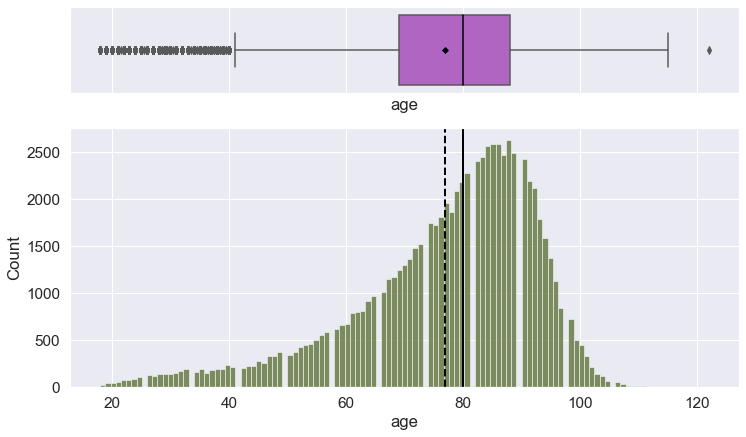

<IPython.core.display.Javascript object>

In [24]:
# Plotting histogram and boxplot of age with skewness displayed
hist_box(df, "age")
print(f'Skewness: {df["age"].skew()}')

#### Observations:
- `age` has a highly left skewed distribution with outliers at both ends, with at least one value over 120 years.
- Mean and median are ~77 and 80 years, respectively.
- There may be two combined distributions here, one peaking at ~85 and the other at ~50.
- Let us take a look at a squared transformation of the target.

#### `age_sqrd` (target$^2$)

Skewness: -0.47512507801792764


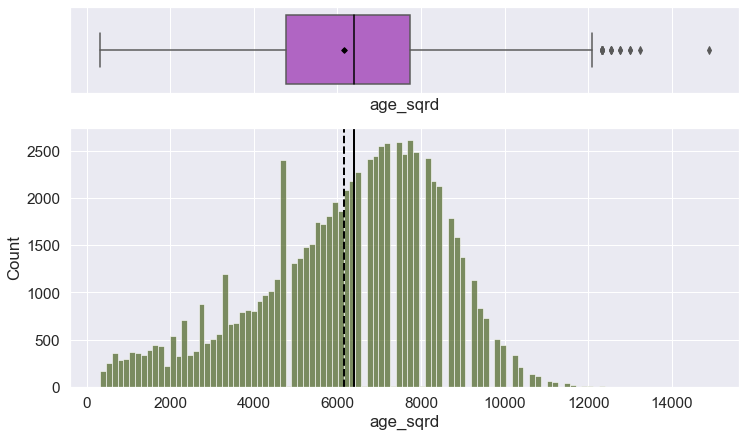

<IPython.core.display.Javascript object>

In [25]:
# Creating age_sqr column
df["age_sqrd"] = (df["age"]) ** (2)

# Plotting histogram and boxplot of age with skewness displayed
hist_box(
    df, "age_sqrd",
)

print(f'Skewness: {df["age_sqrd"].skew()}')

#### Observations:
- The transformation improved the centerdness of the distribution, with just a few remaining upper-end outliers.
- We will retain the additional transformed target in addition to the original column.

### `num_references`

Skewness: 9.403521861627862


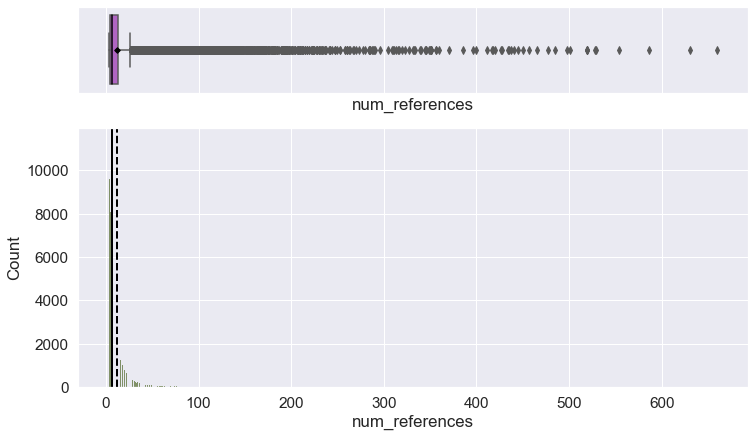

<IPython.core.display.Javascript object>

In [26]:
# Plotting histogram and boxplot of num_references with skewness displayed
hist_box(df, "num_references")
print(f'Skewness: {df["num_references"].skew()}')

#### Observations:
- `num_references` has a very highly right skewed distribution, with upper-end outliers with over 600 references.
- As our proxy feature for "knownness", we can see that this characteristic goes to extremes on the upper-end which is no surprise.  The entire dataset represents notable individuals, and there are the notable among the notable.
- We will look more closely at a log transformation of this feature.

#### `log_num_references`

Skewness: 1.0054607589507774


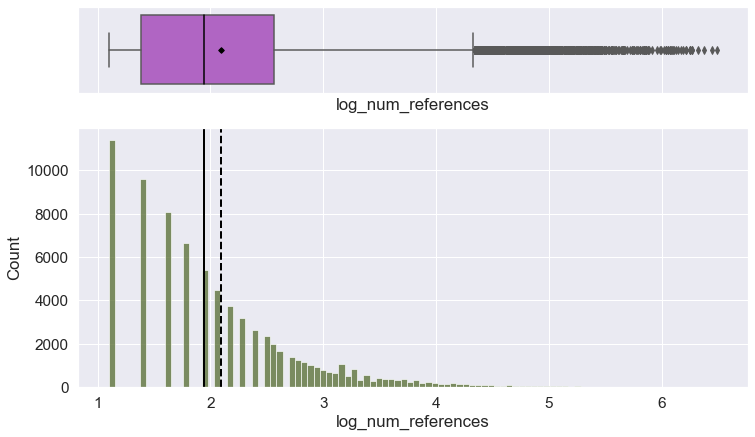

<IPython.core.display.Javascript object>

In [27]:
# Creating log_num_references (minimum num_references is 2 for this dataset so no need to add 1 to x)
df["log_num_references"] = df["num_references"].apply(lambda x: np.log(x))

# Plotting histogram and boxplot of num_references with skewness displayed
hist_box(df, "log_num_references")
print(f'Skewness: {df["log_num_references"].skew()}')

#### Observations:
- `log_num_references` is also highly right skewed, albeit magnitudes less than the original `num_references` feature.
- Let us try a reciprocal transformation of `num_references` (i.e., 1/`num_references`).

#### `recip_num_references`

Skewness: 0.45180838005836643


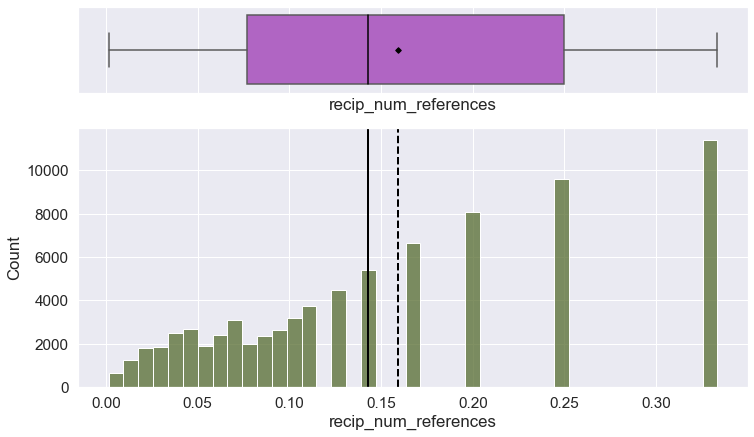

<IPython.core.display.Javascript object>

In [28]:
# Creating recip_num_references = 1/num_references
df["recip_num_references"] = df["num_references"].apply(lambda x: 1 / x)

# Plotting histogram and boxplot of num_references with skewness displayed
hist_box(df, "recip_num_references")
print(f'Skewness: {df["recip_num_references"].skew()}')

#### Observations:
- The reciprocal transformation was more effective in decreasing the skewness of the distribution.
- There are two to three modes.
- We will proceed retaining `recip_num_references`, in addition to the original column, and dropping `log_num_references`.

#### Dropping `log_num_references`

In [29]:
# Dropping log_num_references
df.drop("log_num_references", axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

### `year`

Skewness: -0.7595226699313277


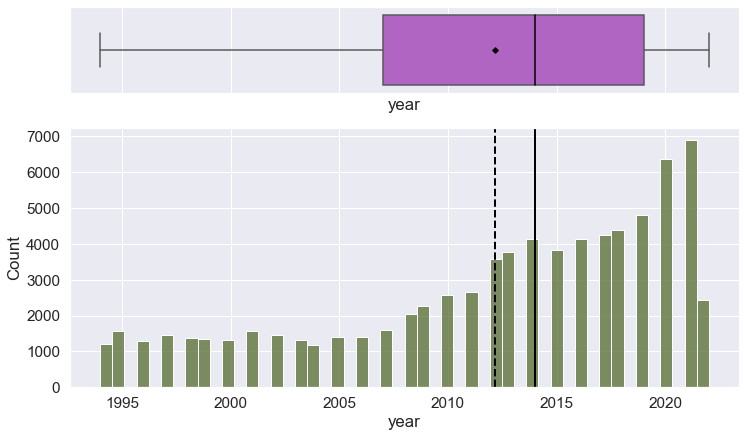

<IPython.core.display.Javascript object>

In [30]:
# Plotting histogram and boxplot of year with skewness displayed
hist_box(df, "year")
print(f'Skewness: {df["year"].skew()}')

#### Observations:
- The distribution for `year` is moderately left skewed, with no outliers.
- The number of entries is quite level from 1994 through 2007, then begins an upward trend.
- The low count for 2022 is consistent with just under half of the year being represented in the dataset.
- 2014, the median, splits the dataset in half, which makes sense as we would expect reporting to have increased with increased use of the Internet as well as population increase.  
- The consistency of the earlier years is interesting.  Wikipedia had its first edit on January 15, 2001. The level counts for the adjacent years may reflect similar retroactive death reporting activity as current death reporting activity. The consistency of entries for the ~10-year period is not likely explained by level numbers of actual deaths of notable people.
- An additional approach to the analysis and modeling would be to separate the dataset into two sets--one for before the Wikipedia launch (2000 and earlier) and one for after (2001 and later).
- Let us examine a transformation of the feature that is converted to cumulative number of years from 1994, then squared ((`year` - 1994)$^2$).

Skewness: -0.12263921791121978


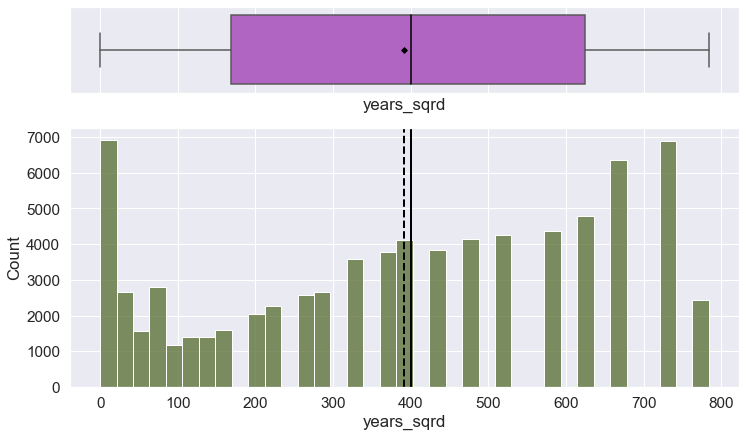

<IPython.core.display.Javascript object>

In [31]:
# Creating years_sqrd column
df["years_sqrd"] = (df["year"] - 1994) ** 2

# Plotting histogram and boxplot of num_references with skewness displayed
hist_box(df, "years_sqrd")
print(f'Skewness: {df["years_sqrd"].skew()}')

#### Observations:
- The transformation improved the centerdness considerably.  
- We will retain it in addition to the original column.

### Univariate Analysis -- Categorical Features

#### Function for Labeled Countplots

In [32]:
# Define a function to create labeled countplots
def labeled_countplot(
    data, feature, perc=False, rotation=90, height=6, n=None, order=None
):
    """
    Countplot with count or percentage at top
    
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None--displays all levels)
    order: order to display levels (default is None)
    rotation: xtick rotation (default is 90)
    height: figure height (default is 6)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()  # Number of columns
    if n is None:
        plt.figure(
            figsize=(count + 1, height)
        )  # Sets figure width according to total number of categories
    else:
        plt.figure(figsize=(n + 1, height))

    plt.xticks(rotation=rotation, fontsize=15)  # X-tick label rotation and size

    ax = sns.countplot(  # Create the axes as countplot
        data=data, x=feature, palette="Accent_r", order=order
    )

    for p in ax.patches:  # For loop to label each bar (each bar is a p in patches)
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Assign label as category percentage of total
        else:
            label = p.get_height()  # Assign label as category count

        x = p.get_x() + p.get_width() / 2  # Find center of the bar in x direction
        y = p.get_height()  # Find top of the bar

        ax.annotate(  # Annotate the bar with label
            label,
            (x, y),  # The location on the plot being annotated
            ha="center",  # Centers label text horizontally about its given coordinates
            va="center",  # Centers label text vertically about its given coordinates
            size=14,  # Font size
            xytext=(0, 5),  # The label coordinates
            textcoords="offset points",
        )  # Offsets to label coordinates with origin at (x,y)

<IPython.core.display.Javascript object>

### `year`

Unique values: 29


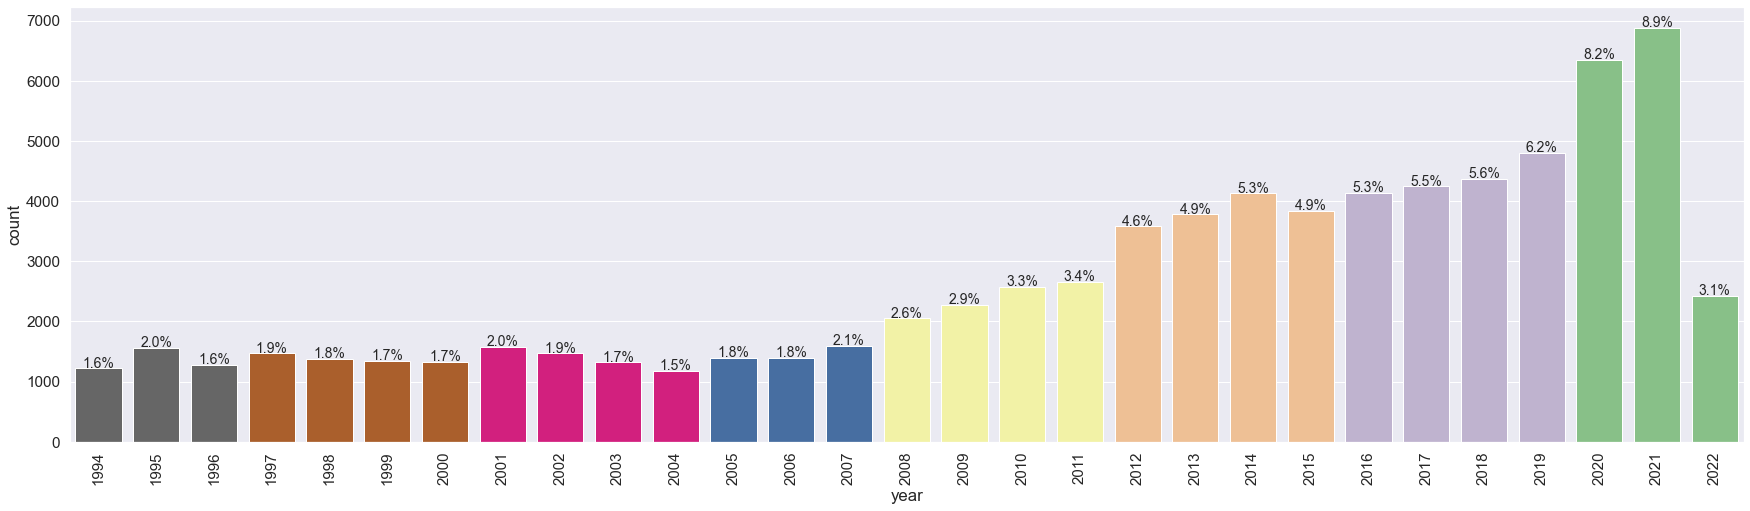

<IPython.core.display.Javascript object>

In [33]:
# Countplot and number of unique values for year
print(f"Unique values: {df['year'].nunique()}")
labeled_countplot(df, "year", perc=True, height=8)

#### Observations:
- Here, we simply take another look at the temporal feature `year`, presented as a categorical feature, with the timeline order preserved.

### `month`

Unique values: 12


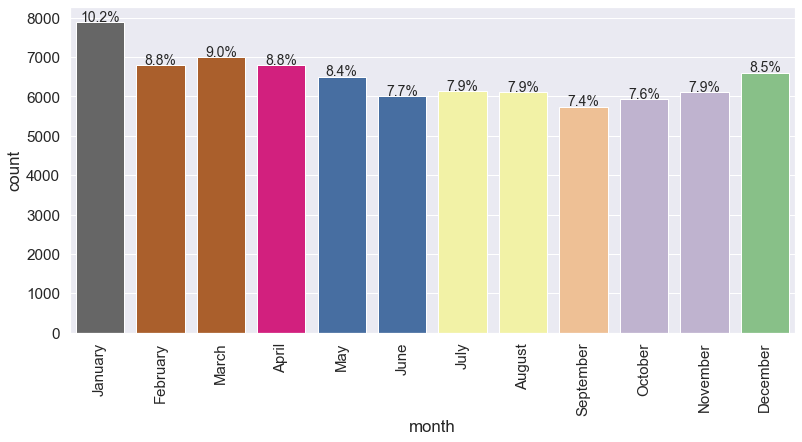

<IPython.core.display.Javascript object>

In [34]:
# Countplot and number of unique values for month
print(f"Unique values: {df['month'].nunique()}")
labeled_countplot(
    df,
    "month",
    perc=True,
    order=[
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ],
)

#### Observations:
- More notable deaths are reported in January, at 10.2%, than in any other month.
- There is a decrease in notable deaths during the northern hemisphere's warmer months, which is consistent with what we expect for the dataset, which is dominated by entries from the northern hemisphere.
- September has the fewest notable deaths reported, at 7.4%.

### `place_1`

Unique values: 210


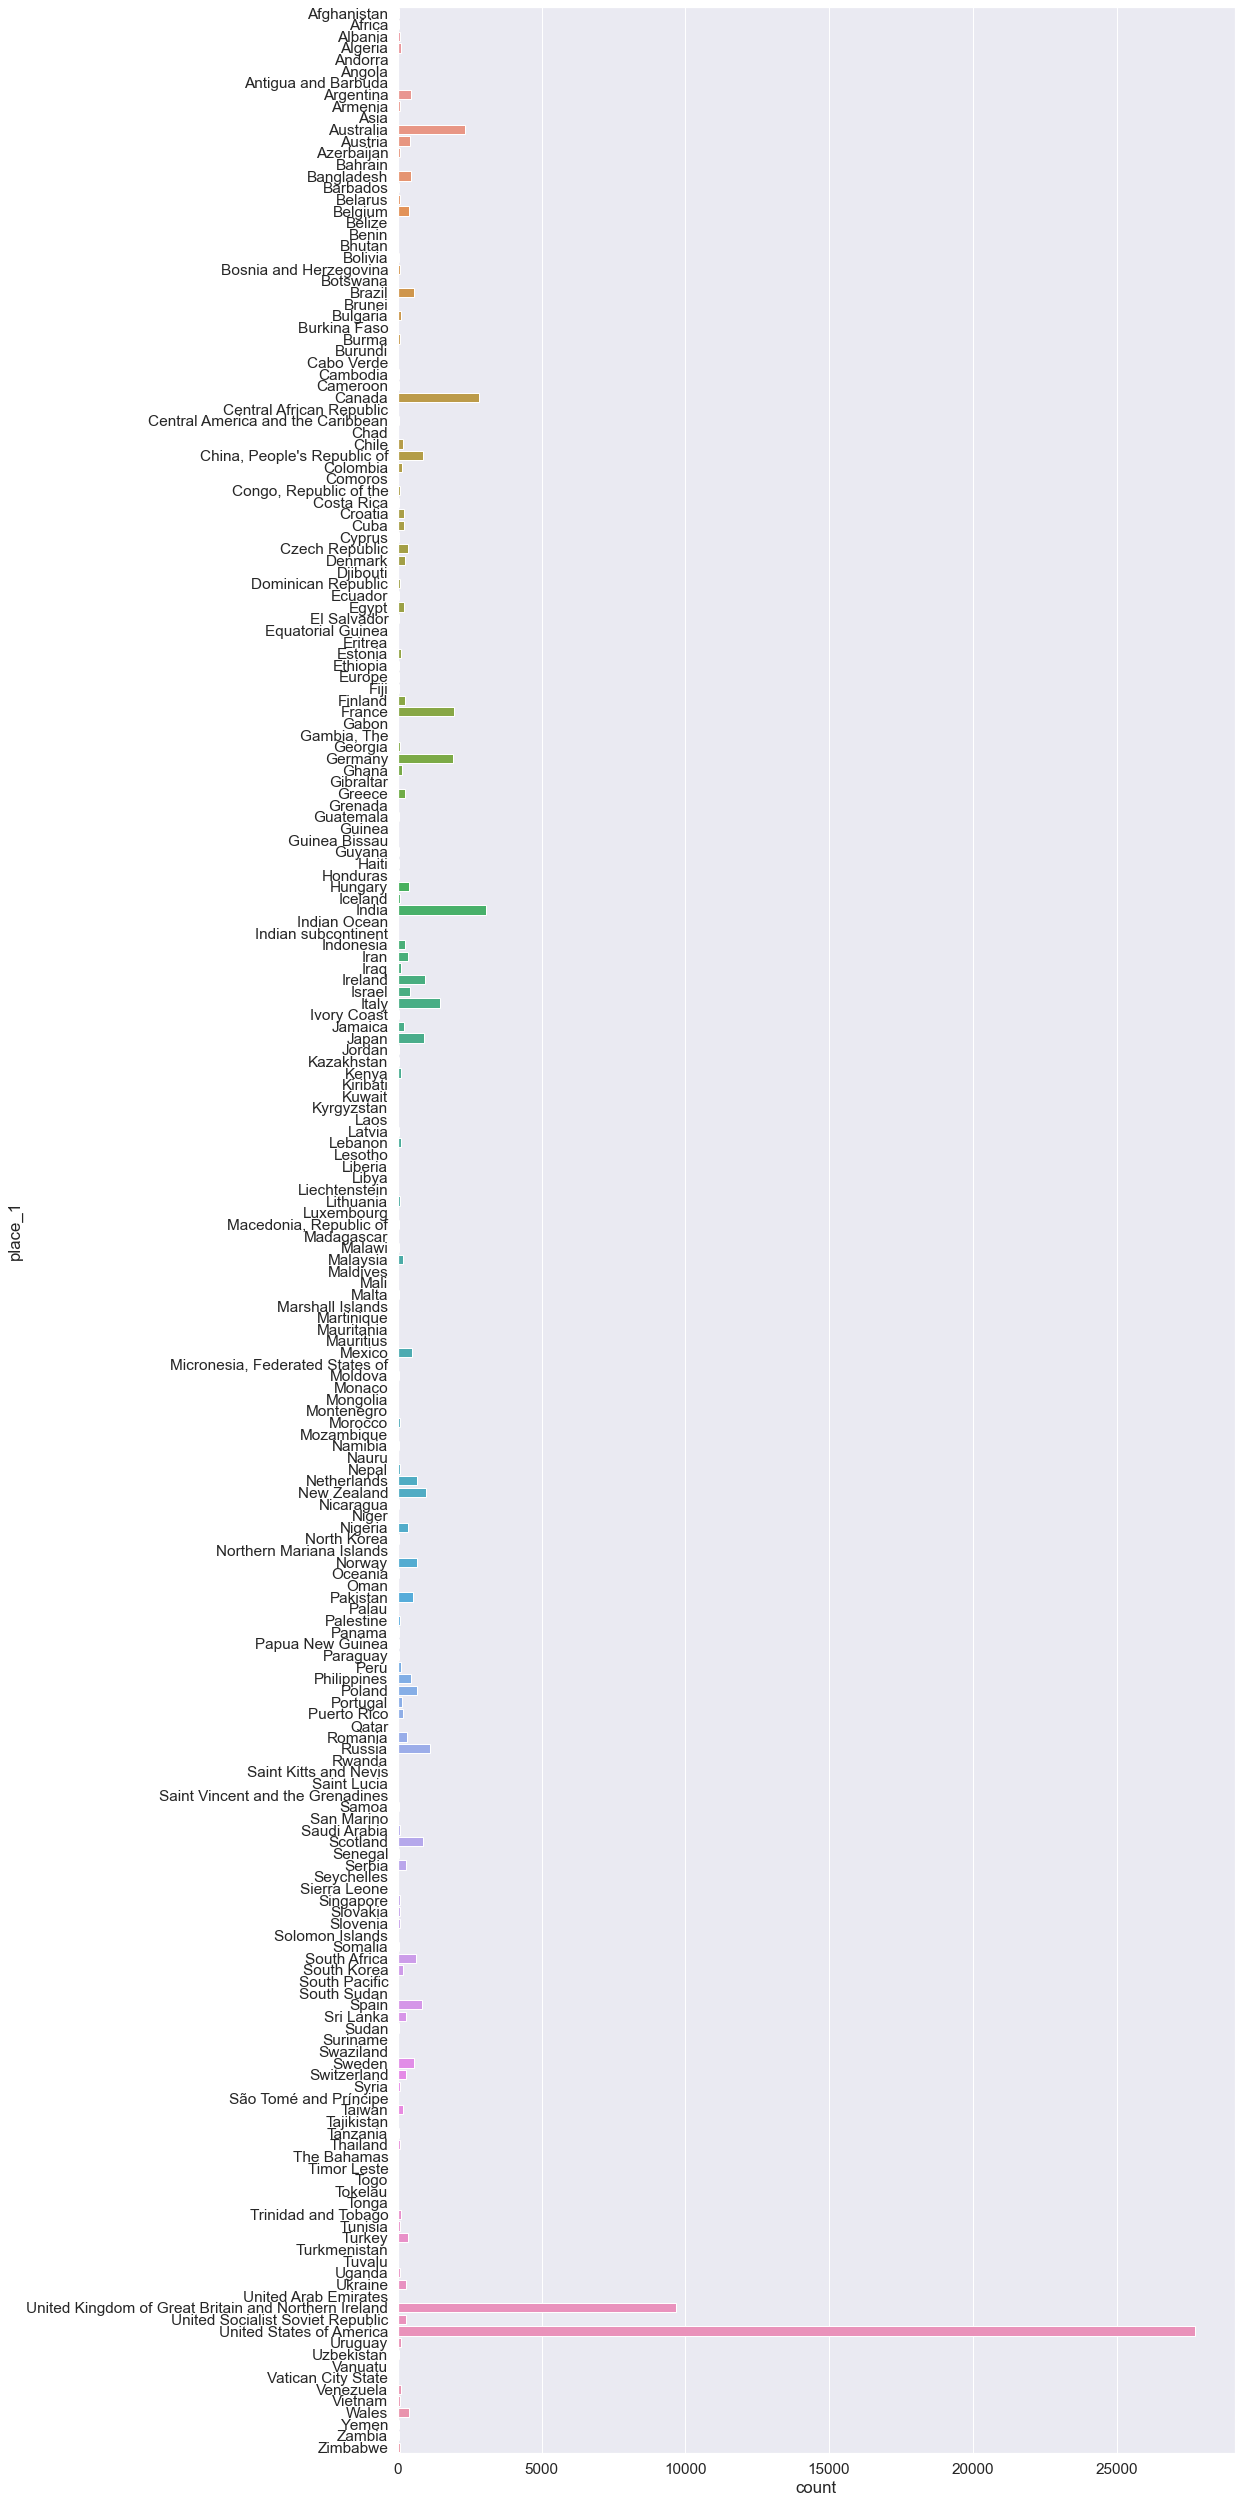

<IPython.core.display.Javascript object>

In [35]:
# Countplot and number of unique values for place_1
print(f"Unique values: {df['place_1'].nunique()}")
plt.figure(figsize=(15, 45))
sns.countplot(data=df, y="place_1")
plt.show()

#### Observations:
- Over 1/3 of entries are from the United States of America, with the United Kingdom having the second highest count at nearly 10,000.
- Let us take a closer look at the top 10 `place_1` countries.
- Recall that we do have missing values for `place_1`, which we will treat during data pre-processing for modeling.

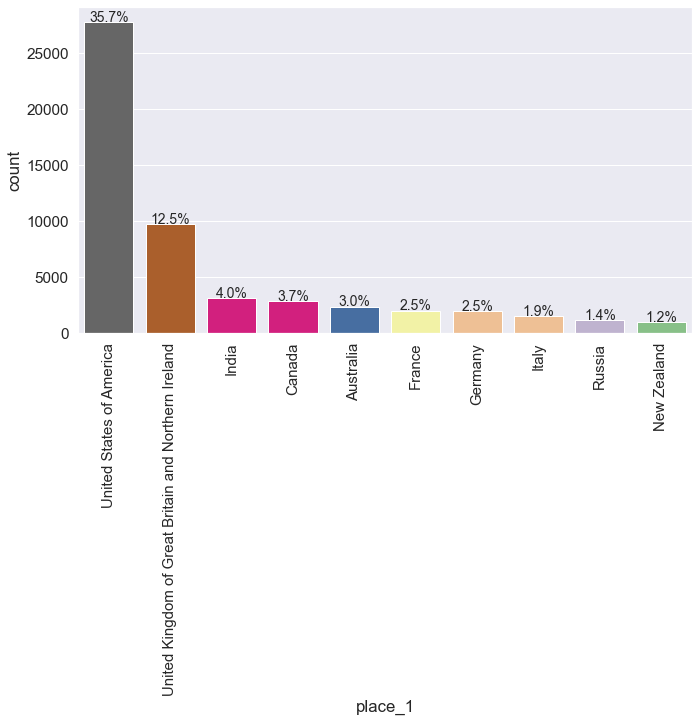

<IPython.core.display.Javascript object>

In [36]:
# Countplot for top 10 place_1 countries
n = 10
order = df["place_1"].value_counts().index[:n]
labeled_countplot(df, "place_1", perc=True, n=n, order=order)

#### Observations:
- India, Canada, Australia, France, Germany, Italy, Russia, and New Zealand make up the rest of the top 10 `place_1` countries.
- The top 10 values account for ~68% of entries.

### `place_2`

Unique values: 148


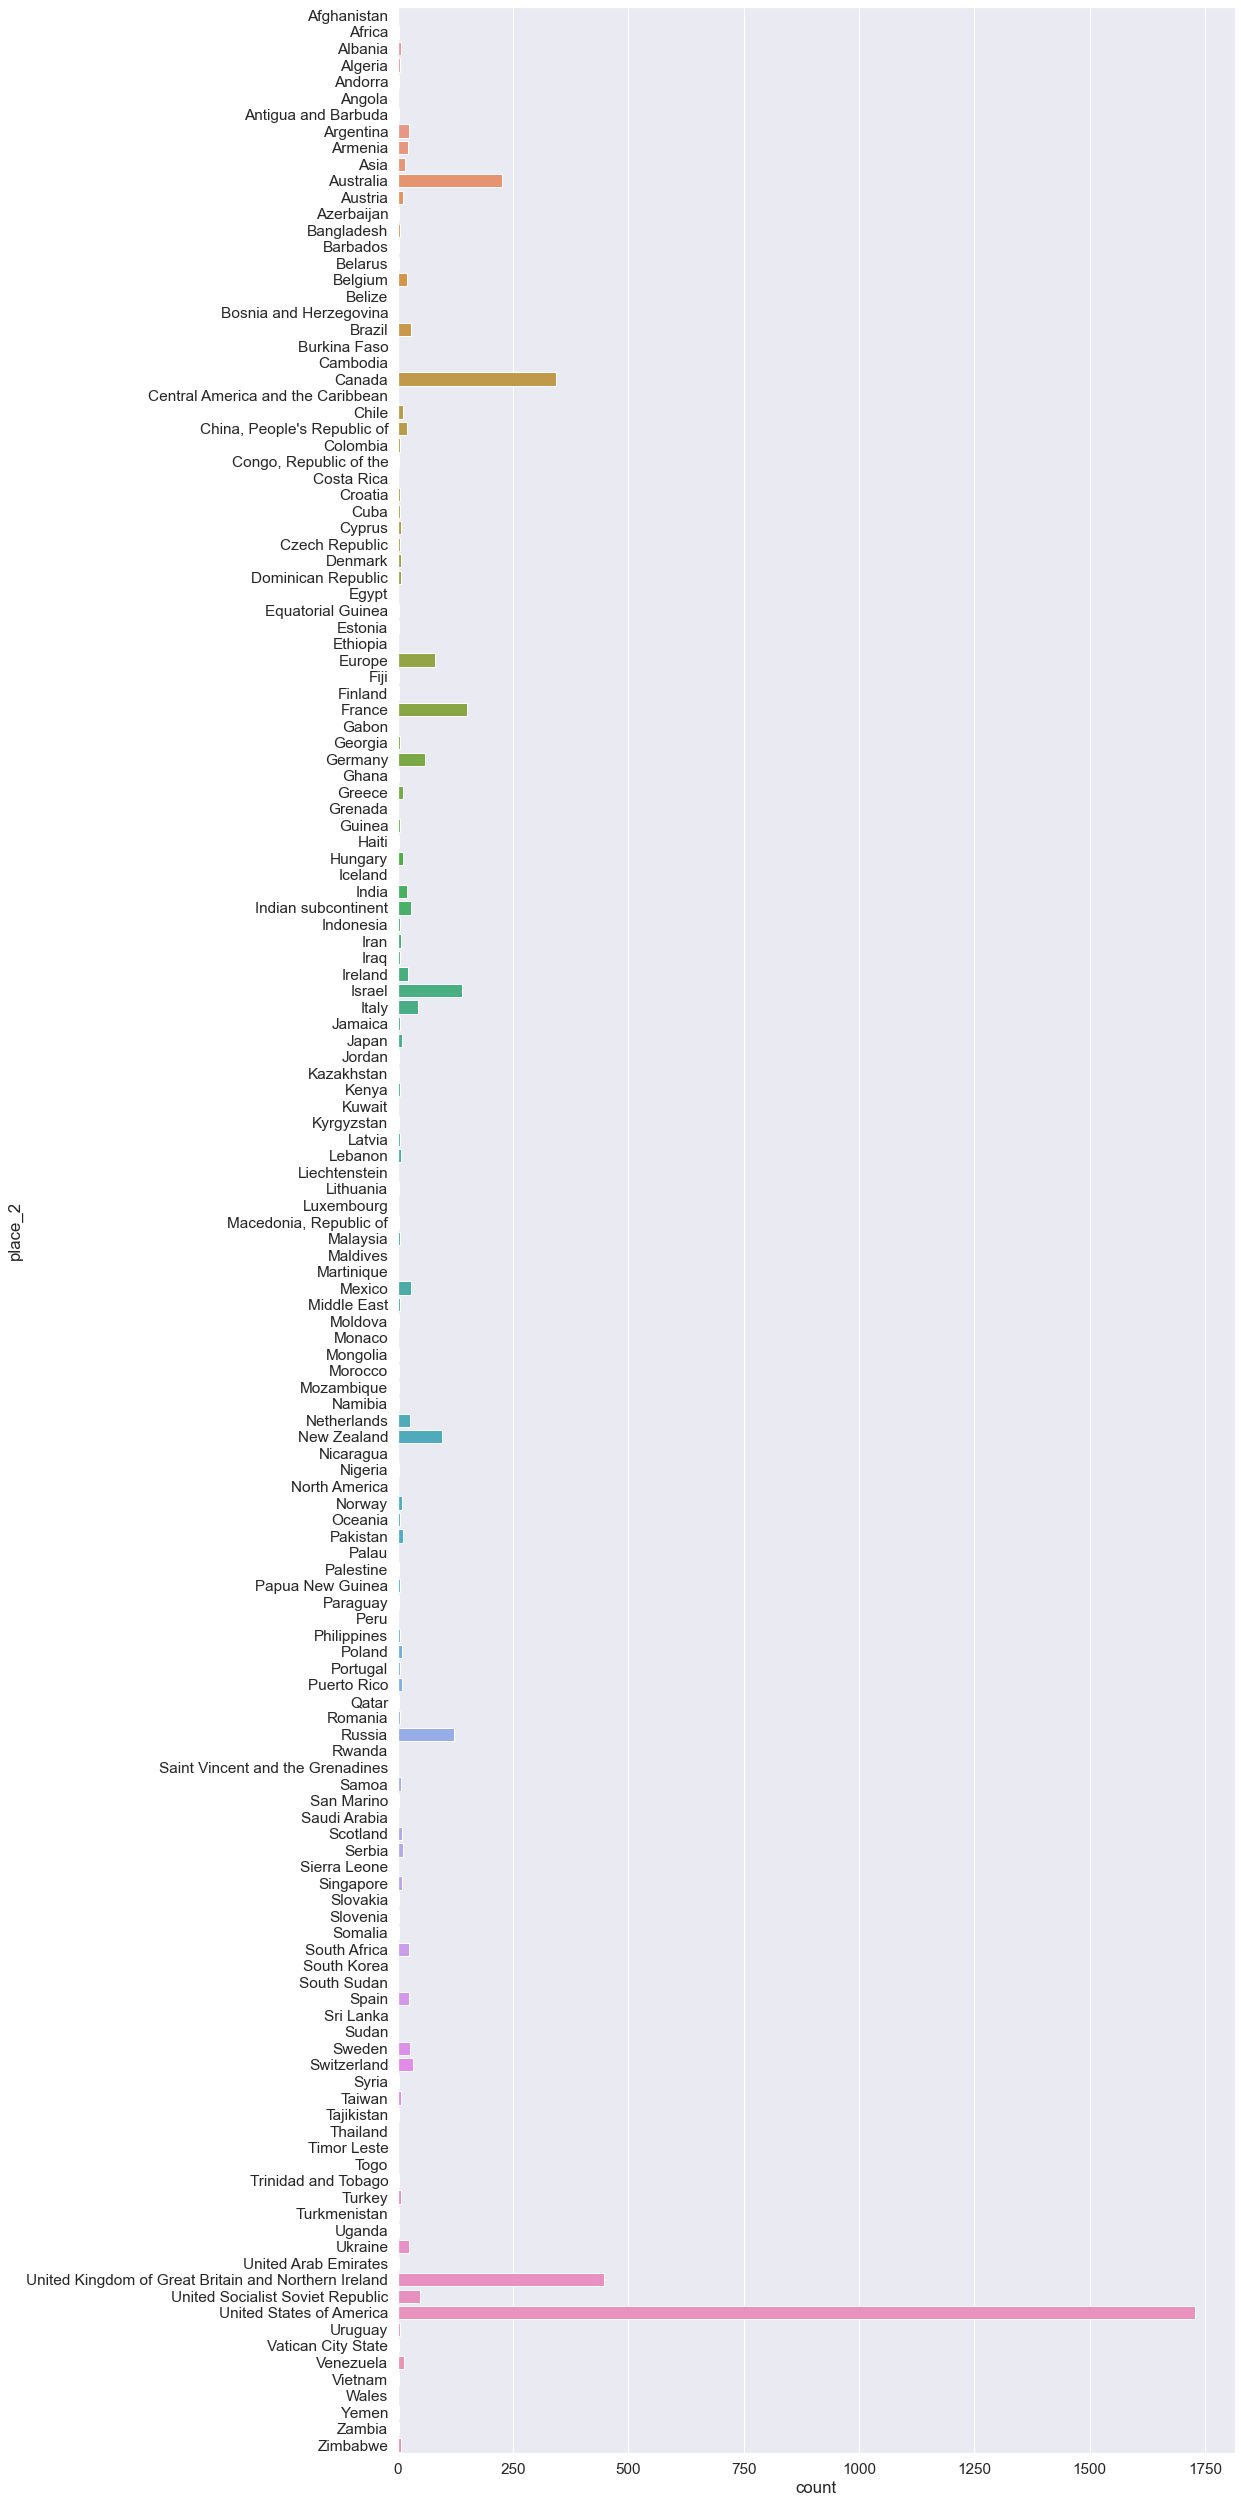

<IPython.core.display.Javascript object>

In [37]:
# Countplot and number of unique values for place_2
print(f"Unique values: {df['place_2'].nunique()}")
plt.figure(figsize=(15, 45))
sns.countplot(data=df, y="place_2")
plt.show()

#### Observations:
- The United States of America also accounts for the highest number of `place_2` values, at nearly 1750.
- The United Kingdom is second followed by Canada.
- Let us take a closer look at the top 10 `place_2` countries.

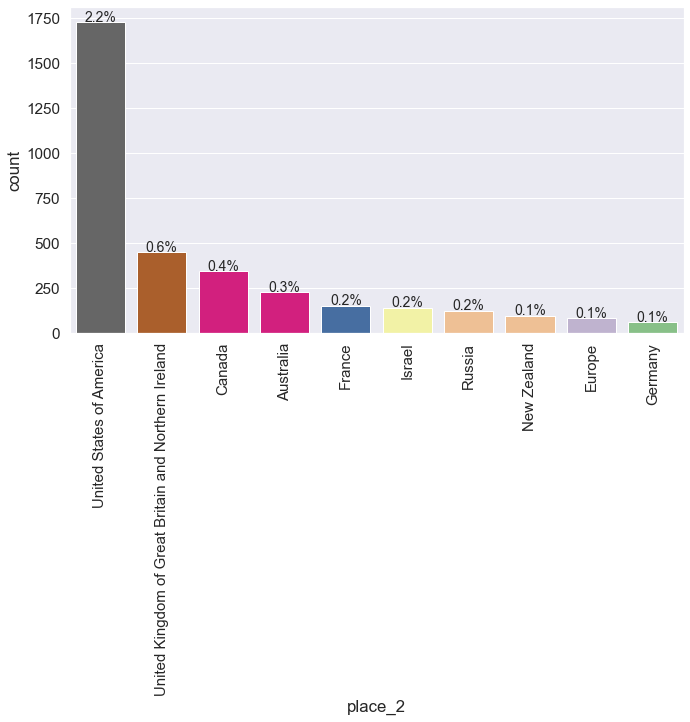

<IPython.core.display.Javascript object>

In [38]:
# Countplot for top 10 place_2 countries
n = 10
order = df["place_2"].value_counts().index[:n]
labeled_countplot(df, "place_2", perc=True, n=n, order=order)

#### Observations:
- Australia, France, Israel, Russia, New Zealand, Europe, and Germany make up the rest of the top 10 `place_2` values.
- The top 10 `place_2` countries account for less than 5% of entries, with most entries not having a `place_2` value.
- Before proceeding, it is time to extract geographic region for the `place_` columns, to reduce dimensionality of that feature.  

### Extracting `region` and `prior_region` from `place_1` and `place_2`
`place_1` represents initial location of residence for all entries, but also lifelong nation of residence for the vast majority of entries.  Meanwhile, `place_2` represents ultimate location of residence for only the small portion of entries that relocated from `place_1`.  A better representation would have the ultimate location for all entries in one column (i.e., the only location for the vast majority) and the prior location in another column (i.e., for the small minority plus a new category "No Prior Region" for the vast majority).  We will create `region` and `prior_region` to accomplish the above respective tasks.  At the same time we will reduce the number of levels by converting `place_` values to geographic regions.

To convert the values, we will use the defined Map of the World's Continents and Regions from [nationsonline.org](https://www.nationsonline.org/oneworld/small_continents_map.htm#google_vignette), as seen below, to extract `region_` values from `place_` values.  Our `region_` values will include the following:
- North America
- Mid-Cent America/Caribbean (includes Middle and Central America and the Caribbean)
- South America
- Europe (excludes Russian Federation and USSR values)
- Russian Federation
- Africa
- Middle East
- Central Asia
- Asia
- South East Asia
- Oceania (includes Australia)  

We do not have any values for Greenland, so it is excluded.

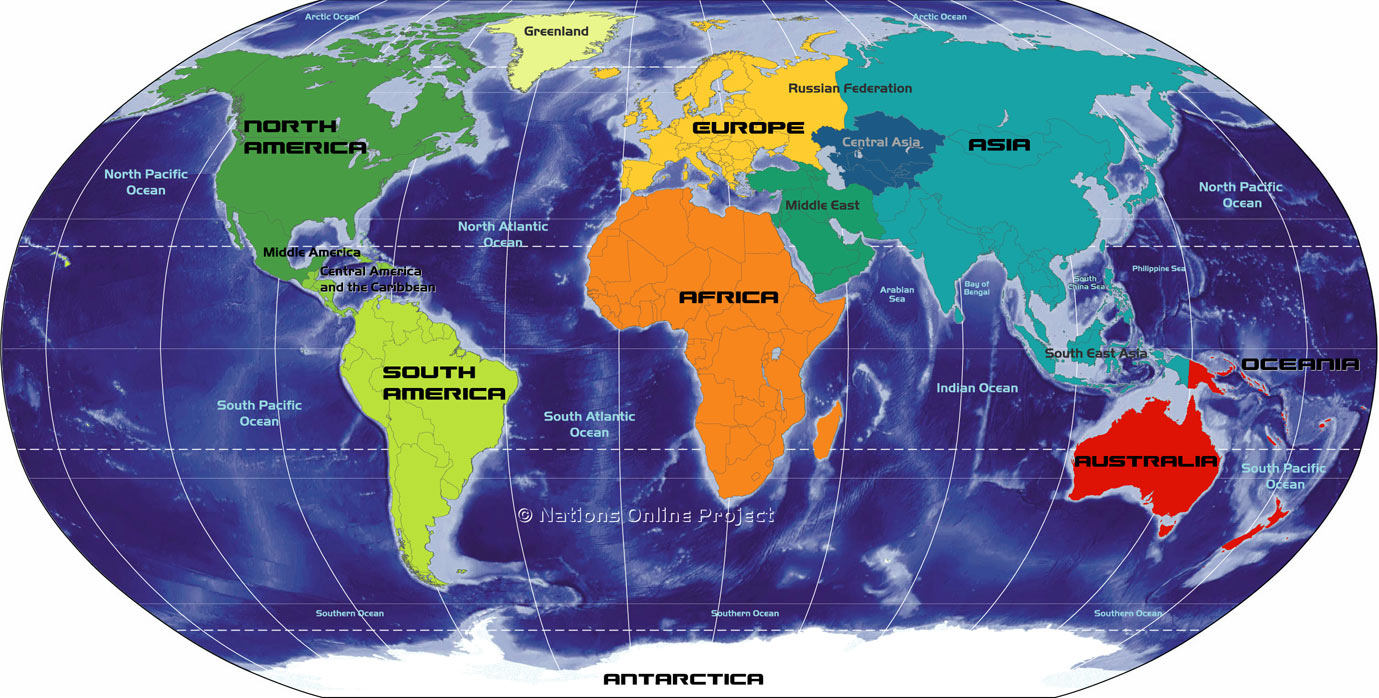

[Countries and Regions of the World from A to Z](https://www.nationsonline.org/oneworld/countries_of_the_world.htm#L)

#### Creating Dictionary of `region_` Keys and `place_` Values

In [39]:
# # Creating list of place_1 values
# place1_list = df["place_1"].value_counts().index.to_list()

<IPython.core.display.Javascript object>

In [40]:
# # Example code to pop entries to add to lists
# place1_list.pop()

<IPython.core.display.Javascript object>

In [41]:
# Re-creating place1_list
place1_list = df["place_1"].value_counts().index.to_list()

# Creating place2_list
place2_list = df["place_2"].value_counts().index.tolist()

# Checking for place_2 values that need to be added to lists generated with place 1 values
[place for place in place2_list if place not in place1_list]

['Middle East', 'North America']

<IPython.core.display.Javascript object>

In [42]:
# Creating lists for each region
north_america = ["Canada", "United States of America", "North America"]

mid_cent_america_carribean = [
    "Martinique",
    "Saint Vincent and the Grenadines",
    "Antigua and Barbuda",
    "Saint Kitts and Nevis",
    "Saint Lucia",
    "Grenada",
    "Belize",
    "The Bahamas",
    "El Salvador",
    "Nicaragua",
    "Panama",
    "Costa Rica",
    "Barbados",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Central America and the Caribbean",
    "Dominican Republic",
    "Trinidad and Tobago",
    "Puerto Rico",
    "Cuba",
    "Jamaica",
    "Mexico",
]

south_america = [
    "Suriname",
    "Paraguay",
    "Bolivia",
    "Guyana",
    "Ecuador",
    "Peru",
    "Uruguay",
    "Venezuela",
    "Colombia",
    "Chile",
    "Argentina",
    "Brazil",
]

europe = [
    "Vatican City State",
    "Gibraltar",
    "Liechtenstein",
    "San Marino",
    "Andorra",
    "Monaco",
    "Luxembourg",
    "Montenegro",
    "Moldova",
    "Europe",
    "Macedonia, Republic of",
    "Malta",
    "Latvia",
    "Iceland",
    "Belarus",
    "Slovakia",
    "Bosnia and Herzegovina",
    "Albania",
    "Lithuania",
    "Slovenia",
    "Estonia",
    "Bulgaria",
    "Portugal",
    "Croatia",
    "Denmark",
    "Finland",
    "Greece",
    "Ukraine",
    "Serbia",
    "Switzerland",
    "Romania",
    "Czech Republic",
    "Wales",
    "Belgium",
    "Hungary",
    "Austria",
    "Sweden",
    "Poland",
    "Netherlands",
    "Norway",
    "Spain",
    "Scotland",
    "Ireland",
    "Italy",
    "Germany",
    "France",
    "United Kingdom of Great Britain and Northern Ireland",
]

russian_federation = ["United Socialist Soviet Republic", "Russia"]

africa = [
    "Lesotho",
    "São Tomé and Príncipe",
    "Comoros",
    "Djibouti",
    "Seychelles",
    "Guinea Bissau",
    "South Sudan",
    "Eritrea",
    "Equatorial Guinea",
    "Botswana",
    "Swaziland",
    "Burundi",
    "Central African Republic",
    "Chad",
    "Mauritania",
    "Niger",
    "Cabo Verde",
    "Gambia, The",
    "Gabon",
    "Togo",
    "Burkina Faso",
    "Mozambique",
    "Madagascar",
    "Rwanda",
    "Liberia",
    "Mauritius",
    "Benin",
    "Guinea",
    "Sierra Leone",
    "Mali",
    "Libya",
    "Angola",
    "Sudan",
    "Malawi",
    "Ivory Coast",
    "Somalia",
    "Senegal",
    "Ethiopia",
    "Zambia",
    "Tanzania",
    "Namibia",
    "Cameroon",
    "Africa",
    "Tunisia",
    "Uganda",
    "Congo, Republic of the",
    "Morocco",
    "Zimbabwe",
    "Algeria",
    "Kenya",
    "Ghana",
    "Egypt",
    "Nigeria",
    "South Africa",
]

middle_east = [
    "Oman",
    "Qatar",
    "Bahrain",
    "United Arab Emirates",
    "Kuwait",
    "Yemen",
    "Jordan",
    "Saudi Arabia",
    "Cyprus",
    "Palestine",
    "Syria",
    "Armenia",
    "Azerbaijan",
    "Georgia",
    "Georgia",
    "Lebanon",
    "Iraq",
    "Iran",
    "Turkey",
    "Israel",
    "Middle East",
]

central_asia = ["Turkmenistan", "Tajikistan", "Kyrgyzstan", "Uzbekistan", "Kazakhstan"]

asia = [
    "Indian Ocean",
    "Bhutan",
    "Indian subcontinent",
    "Maldives",
    "Mongolia",
    "Asia",
    "North Korea",
    "Afghanistan",
    "Nepal",
    "Armenia",
    "South Korea",
    "Taiwan",
    "Sri Lanka",
    "Bangladesh",
    "Pakistan",
    "China, People's Republic of",
    "Japan",
    "India",
]

south_east_asia = [
    "Brunei",
    "Timor Leste",
    "Cambodia",
    "Singapore",
    "Burma",
    "Vietnam",
    "Thailand",
    "Malaysia",
    "Indonesia",
    "Philippines",
]

oceania = [
    "Tokelau",
    "South Pacific",
    "Kiribati",
    "Palau",
    "Nauru",
    "Vanuatu",
    "Micronesia, Federated States of",
    "Marshall Islands",
    "Laos",
    "Northern Mariana Islands",
    "Tuvalu",
    "Solomon Islands",
    "Tonga",
    "Samoa",
    "Papua New Guinea",
    "Oceania",
    "Fiji",
    "New Zealand",
    "Australia",
]

<IPython.core.display.Javascript object>

In [43]:
# Combining lists into a single dictionary
region_place_dict = {
    "North America": north_america,
    "Mid-Cent America/Caribbean": mid_cent_america_carribean,
    "South America": south_america,
    "Europe": europe,
    "Russian Federation": russian_federation,
    "Africa": africa,
    "Middle East": middle_east,
    "Central Asia": central_asia,
    "Asia": asia,
    "South East Asia": south_east_asia,
    "Oceania": oceania,
}

<IPython.core.display.Javascript object>

#### Initializing `region` and `prior_region`

In [44]:
# Initializing region and region_1
df[["region", "prior_region"]] = None

<IPython.core.display.Javascript object>

#### Assigning `region`  Values from `place_2` or `place_1`

In [45]:
%%time

# For loop to convert place_2 values to region values for entries with place_2 value
for region, places in region_place_dict.items():
    for place in places:
        for index in df[df['place_2'].notna()].index:
            item = df.loc[index, 'place_2']
            if item:
                if item == place:
                    df.loc[index, 'region'] = region

# For loop to convert place_1 values to region for entries without place_2 value (missing region after above for loop)
for region, places in region_place_dict.items():
    for place in places:
        for index in df[df['region'].isna()].index:
            item = df.loc[index, 'place_1']
            if item:
                if item == place:
                    df.loc[index, 'region'] = region            

# Typecasting new column as category
df['region'] = df['region'].astype('category')

# Checking a sample of rows
df.sample(2)

CPU times: total: 49.2 s
Wall time: 49.6 s


,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years_sqrd,region,prior_region
15934,", 56, American political scientist.",https://en.wikipedia.org/wiki/John_David_Lewis,7,2012,January,None,56.000,None,United States of America,NaN,0,0,0,0,0,0,0,0,1,0,1,3136.000,0.143,324,North America,None
20640,", 50, American actress, singer and dancer, ovarian cancer.",https://en.wikipedia.org/wiki/Anita_Morris,5,1994,March,None,50.000,ovarian cancer,United States of America,NaN,0,0,0,0,0,1,0,0,0,0,1,2500.000,0.200,0,North America,None


<IPython.core.display.Javascript object>

#### Assigning `prior_region`  Values from `place_1` and Adding No Prior Region Region Category

In [46]:
%%time

# For loop to convert place_2 values to region values for entries with place_2 value
for region, places in region_place_dict.items():
    for place in places:
        for index in df[df['place_2'].notna()].index:
            item = df.loc[index, 'place_1']
            if item:
                if item == place:
                    df.loc[index, 'prior_region'] = region

# Replacing missing values with No Prior Region
df['prior_region'].fillna('No Prior Region', inplace=True)

# Typecasting new column
df['prior_region'] = df['prior_region'].astype('category')

# Checking a sample of rows
df.sample(2)

CPU times: total: 7.56 s
Wall time: 7.63 s


,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years_sqrd,region,prior_region
43255,", 51, Russian-American mathematician, 2002 Fields medalist, aneurysm.",https://en.wikipedia.org/wiki/Vladimir_Voevodsky,11,2017,September,None,51.000,aneurysm,Russia,United States of America,1,0,0,0,0,0,0,0,0,0,1,2601.000,0.091,529,North America,Russian Federation
41909,", 90, American soldier, Medal of Honor recipient.",https://en.wikipedia.org/wiki/Paul_J._Wiedorfer,8,2011,May,None,90.000,None,United States of America,NaN,0,0,0,0,0,0,0,1,0,0,1,8100.000,0.125,289,North America,No Prior Region


<IPython.core.display.Javascript object>

#### Observations:
- As we have zoomed out on our residency values from specific locales to broader regions, we undoubtedly now have entries that have duplicate values for `region` and `prior_region` (e.g. `place_1` of Italy and `place_2` of Germany will have Europe for `region` and `prior_region`).
- We will allow this duplication, as any `prior_region` level other than No Prior Region indicates a relocation took place, even if the before and after regions match.  Recall that we already dropped `place_2` values that were duplicates of `place_1`, so they will have `prior_region` of No Prior Region.

#### Verifying All `region` and `prior_region` Values Captured

In [47]:
# Verifying all regions captured
print(
    f'There are {len(df[df["place_1"].notna()]) - len(df[df["region"].notna()])} entries that contain place_1 and not region.\n'
)

print(
    f'There are {len(df[(df["place_2"].notna()) & (df["prior_region"].isna())])} entries that contain place_2 and not prior_region.'
)


There are 0 entries that contain place_1 and not region.

There are 0 entries that contain place_2 and not prior_region.


<IPython.core.display.Javascript object>

#### Observations:
- We have captured all of the `region` and `prior_region` values and we can now visualize them.

### `region`

Unique values: 11


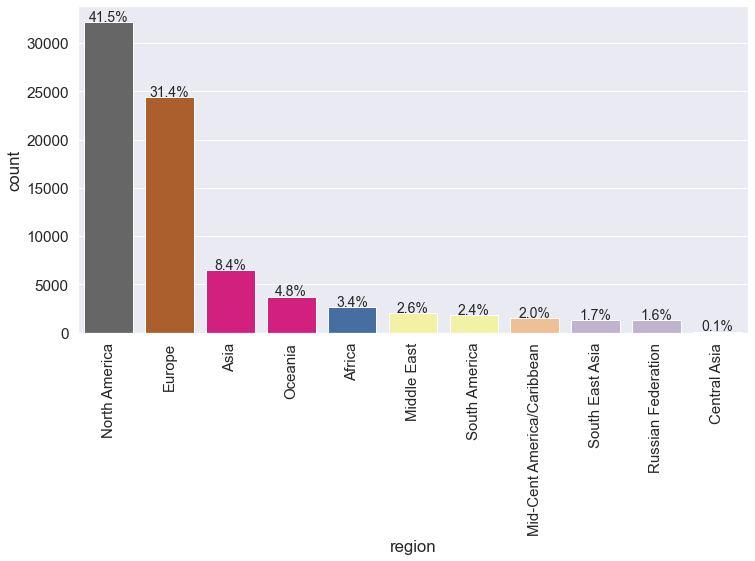

<IPython.core.display.Javascript object>

In [48]:
# Countplot and number of unique values for region
print(f"Unique values: {df['region'].nunique()}")
order = df["region"].value_counts().index
labeled_countplot(df, "region", perc=True, order=order)

#### Observations:
- Here, we visualize the 11 `region` levels, which represent the ultimate region of residency for all entries, which is also the only region for the vast majority of entries.
- North America is the top value for `region`, followed by Europe.  Combined they account for ~73% of entries.
- Central Asia has the fewest entries (0.1%), followed by Russian Federation (1.6%) and South East Asia (1.7%).
- The missing `place_1` values translate into missing `region` values.  As stated previously, we will treat them in data pre-processing for modeling.

### `prior_region`

Unique values: 12


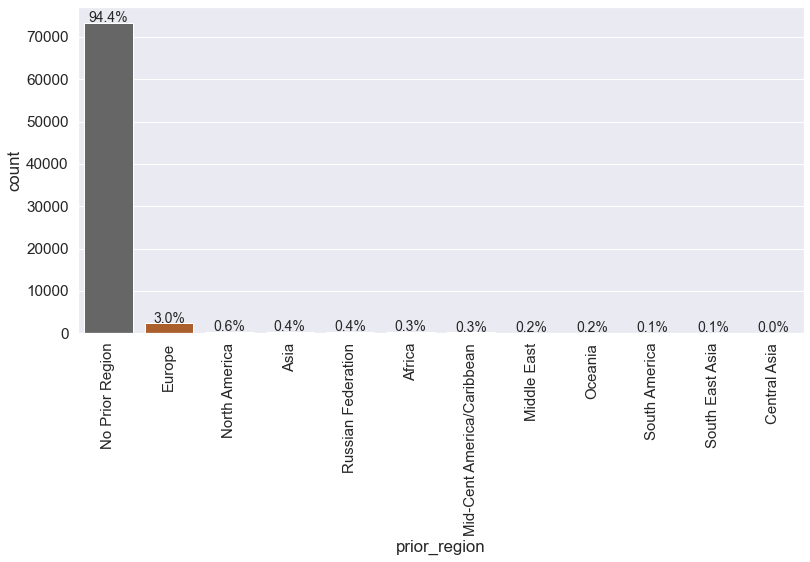

<IPython.core.display.Javascript object>

In [49]:
# Countplot and number of unique values for prior_region
print(f"Unique values: {df['prior_region'].nunique()}")
order = df["prior_region"].value_counts().index
labeled_countplot(df, "prior_region", perc=True, order=order)

#### Observations:
- Here, we visualize the 12 `prior_region` levels, which represent the prior region of residency.
- Over 94% of entries have only one region of residency, or `prior_region` of No Prior Region.
- The most relocations came from European countries (3% of entries).

### `num_categories`

Unique values: 5


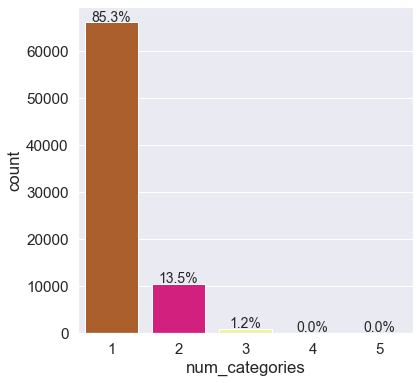

<IPython.core.display.Javascript object>

In [50]:
# Countplot and number of unique values for num_categories
print(f"Unique values: {df['num_categories'].nunique()}")
order = df["num_categories"].value_counts().index
labeled_countplot(df, "num_categories", perc=True, order=order, rotation=0)

#### Observations:
- The vast majority (~85%) of entries have a single `known for` category.
- We will now combine the category column and `num_references` column information into a single category, `known_for`.

### `known_for`
To visualize the `known for` categories, we will create a new column, `known_for`, with values consistent with each category (i.e., `arts`, `politics_govt_law`, etc.), plus the following additional levels:  

    - two (entries with 2 categories)
    - three_to_five (entries with 3, 4, or 5 categories)
The original category names will refer to entries with the sole respective category (i.e., entries with only 1 category). The new levels will refer to entries that have the equivalent `num_references`.

In [54]:
# Initializing known_for column
df["known_for"] = None

# Assigning new levels for entries with multiple categories
df.loc[df[df["num_categories"] == 2].index, "known_for"] = "two"
df.loc[df[df["num_categories"] > 2].index, "known_for"] = "three_to_five"

# For loop to assign known_for values for single-category entries
category_list = [
    "sciences",
    "social",
    "spiritual",
    "academia_humanities",
    "business_farming",
    "arts",
    "sports",
    "law_enf_military_operator",
    "politics_govt_law",
    "crime",
]
for category in category_list:
    for index in df[(df[category] == 1) & (df["num_categories"] == 1)].index:
        df.loc[index, "known_for"] = str(category)

# Typecasting new column
df["known_for"] = df["known_for"].astype("category")

# Checking a sample of rows
df.sample(2)

,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years_sqrd,region,prior_region,known_for
12853,", 90, Australian rugby union player .",https://en.wikipedia.org/wiki/John_Solomon_(rugby_union),10,2020,March,"New South Wales Waratahs, national team",90.000,None,Australia,NaN,0,0,0,0,0,0,1,0,0,0,1,8100.000,0.100,676,Oceania,No Prior Region,sports
18260,", 99, Chinese Roman Catholic clandestine prelate, bishop of Sipingjie .",https://en.wikipedia.org/wiki/Andrew_Han_Jingtao,3,2020,December,since 1982,99.000,None,"China, People's Republic of",NaN,0,0,1,0,0,0,0,0,0,0,1,9801.000,0.333,676,Asia,No Prior Region,spiritual


<IPython.core.display.Javascript object>

### `known_for`

Unique values: 12


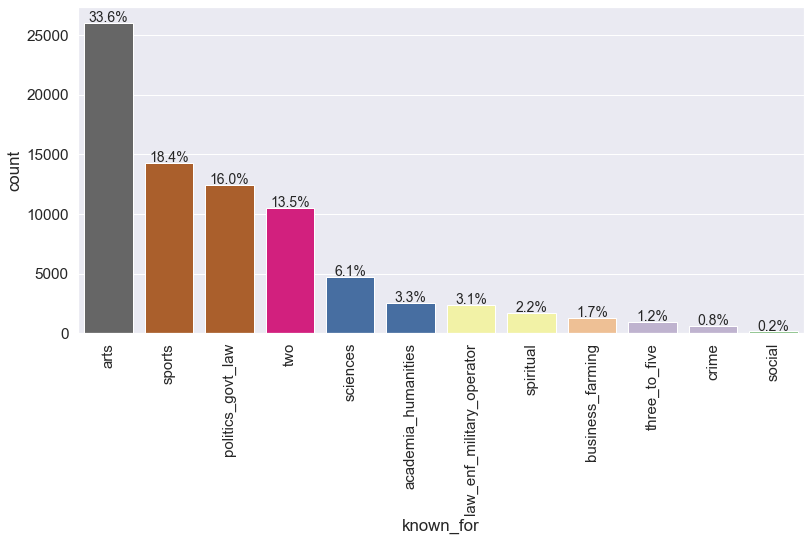

<IPython.core.display.Javascript object>

In [55]:
# Countplot and number of unique values for known_for
print(f"Unique values: {df['known_for'].nunique()}")
order = df["known_for"].value_counts().index
labeled_countplot(df, "known_for", perc=True, order=order)

#### Observations:
- The category arts accounts for just over 1/3 of entries, followed by sports, then politics_govt_law, which combined also account for just over 1/3 of entries.
- Entries with the sole category of social are most rare (0.2%), followed crime (0.8%).
- Let us examine the entries with 2 categories more closely.

#### `known for` Categories for Entries with 2 Categories

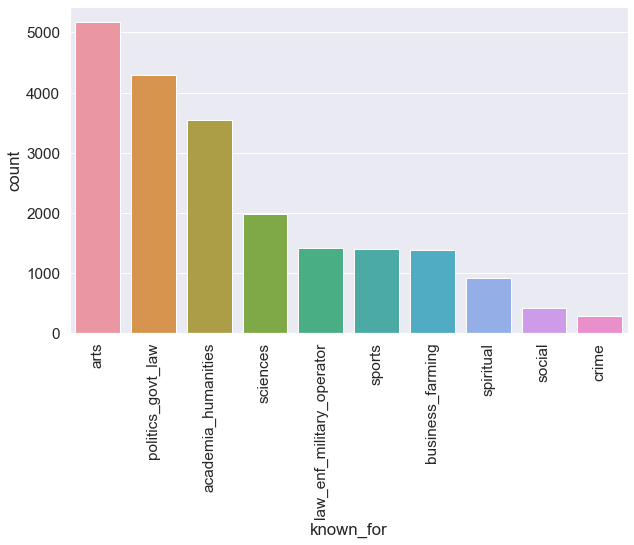

<IPython.core.display.Javascript object>

In [59]:
# Creating dataframe of categories with counts for entries with 2 categories
data = pd.DataFrame(
    df[df["num_categories"] == 2][category_list].sum(), columns=["count"],
).sort_values("count", ascending=False)
data.reset_index(inplace=True)
data.rename(columns={"index": "known_for"}, inplace=True)

# Barplot of category and count
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="known_for", y="count")
plt.xticks(rotation=90)
plt.show()

In [60]:
df[df["known_for"] == "two"]["known_for"].value_counts()

two                          10505
academia_humanities              0
arts                             0
business_farming                 0
crime                            0
law_enf_military_operator        0
politics_govt_law                0
sciences                         0
social                           0
spiritual                        0
sports                           0
three_to_five                    0
Name: known_for, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- The combined count in this plot is double as each entry is represented in two of the categories.
- We can see that arts and politics_govt_law are similarly at or toward the top values, but academia_humanities and sciences have moved up toward the top, while sports has moved down.
- This difference indicates that academia_humanities and sciences have relative higher likelihoods of occurring in combination with another category.  We would anticipate a high number of individuals with with the science category to also be categorized in academia_humanties, as professors in their respective fields, etc.

### Bivariate and Multivariate Analysis

#### Function to plot boxplots with and without outliers

In [61]:
# Define a function to plot boxplots for x categorical feature and y numeric feature with and without outliers
def box_w_wo_fliers(data, x_feature, y_feature, order=None, height=10):
    """
    Plots side by side boxplots, with and without outliers
    
    data = dataframe
    x_feature = categorical feature
    y_feature = numeric feature
    order = order to plot the categorical feature (default is None)
    height = figure height (default is 10)
    """
    fig, axs = plt.subplots(1, 2, figsize=(15, height))

    # Boxplot with outliers
    sns.boxplot(
        data=data,
        x=x_feature,
        y=y_feature,
        ax=axs[0],
        palette="CMRmap",
        order=order,
        medianprops={"color": "teal", "linewidth": 2},
    )

    # Boxplot without outliers
    sns.boxplot(
        data=data,
        x=x_feature,
        y=y_feature,
        ax=axs[1],
        showfliers=False,
        palette="CMRmap",
        order=order,
        showmeans=True,
        medianprops={"color": "teal", "linewidth": 2},
        meanprops={
            "marker": "o",
            "markersize": 9,
            "markeredgecolor": "black",
            "markerfacecolor": "yellowgreen",
        },
    )

    axs[0].set_title("With Outliers")
    axs[1].set_title("Without Outliers")
    axs[0].tick_params(labelrotation=90)
    axs[1].tick_params(labelrotation=90)

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### Correlation

#### Pairplot of Numerical Features w.r.t. `known_for`

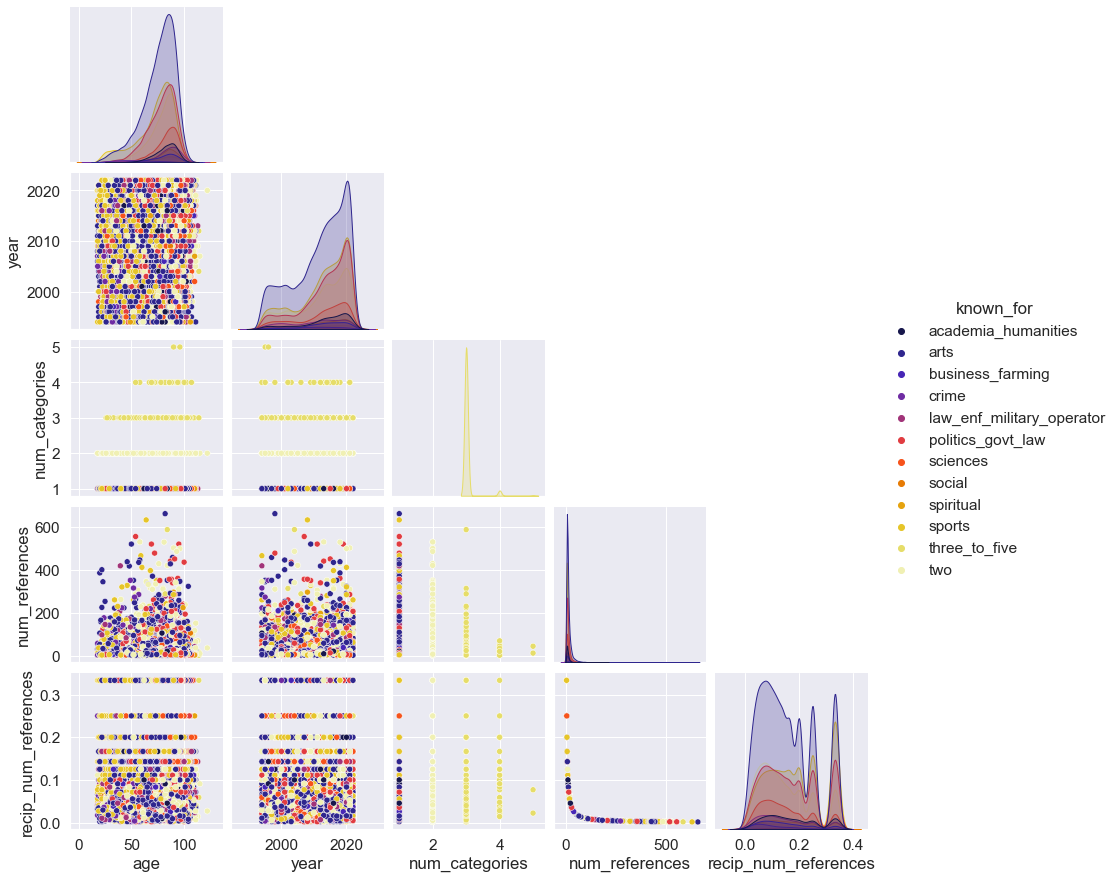

<IPython.core.display.Javascript object>

In [62]:
# Pairplot of numerical features
vars = ["age", "year", "num_categories", "num_references", "recip_num_references"]
sns.pairplot(
    df, diag_kind="kde", corner=True, vars=vars, hue="known_for", palette="CMRmap"
)
plt.show()

#### Heatmap of Correlation of Numerical Features

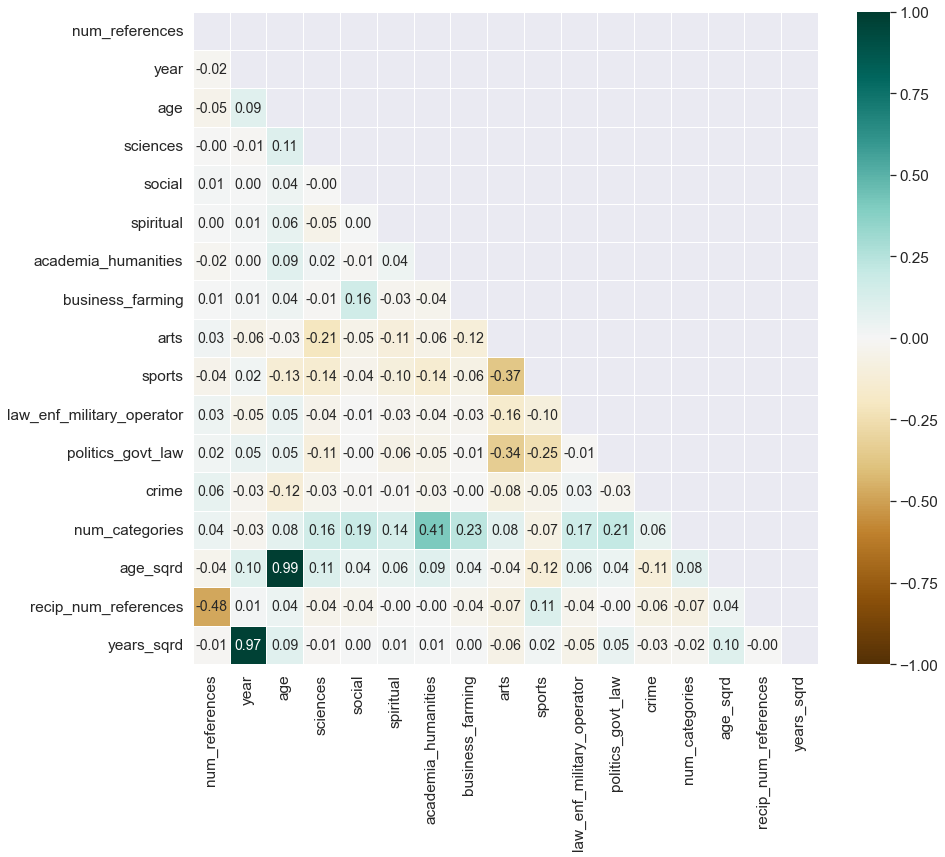

<IPython.core.display.Javascript object>

In [63]:
# Heatmap of correlation of numerical features
plt.figure(figsize=(14, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    data=corr,
    annot=True,
    vmin=-1,
    vmax=1,
    linewidth=1,
    fmt=".2f",
    annot_kws={"size": 14},
    cmap="BrBG",
    mask=mask,
)
plt.show()

#### Observations:
- Aside from original feature to their corresponding transformsations, we do not have any highly correlated numerical features.  From a preditor to predictor standpoint, that is beneficial for modeling.  From a predictor to target standpoint, it indicates that none of the numerical features, are strong linear predictors of the target.
- `academia_humanities` is moderately positively correlated with `num_categories`, as we anticipated.
- Noteworthy moderate negative correlations exist between `arts` and `sports` and `arts` and `politics_govt_law`.  These two `known for` categories are less likely to occur in combination than some of the other categories.  Similarly, `sports` and `politics_govt_law` and `arts` and `sciences` are mildly negatively correlated.
- `business_farming` and `social` are mildly positively correlated, which is consistent with successful people in business participating in philanthropy.  

### `known_for` vs `num_references` 

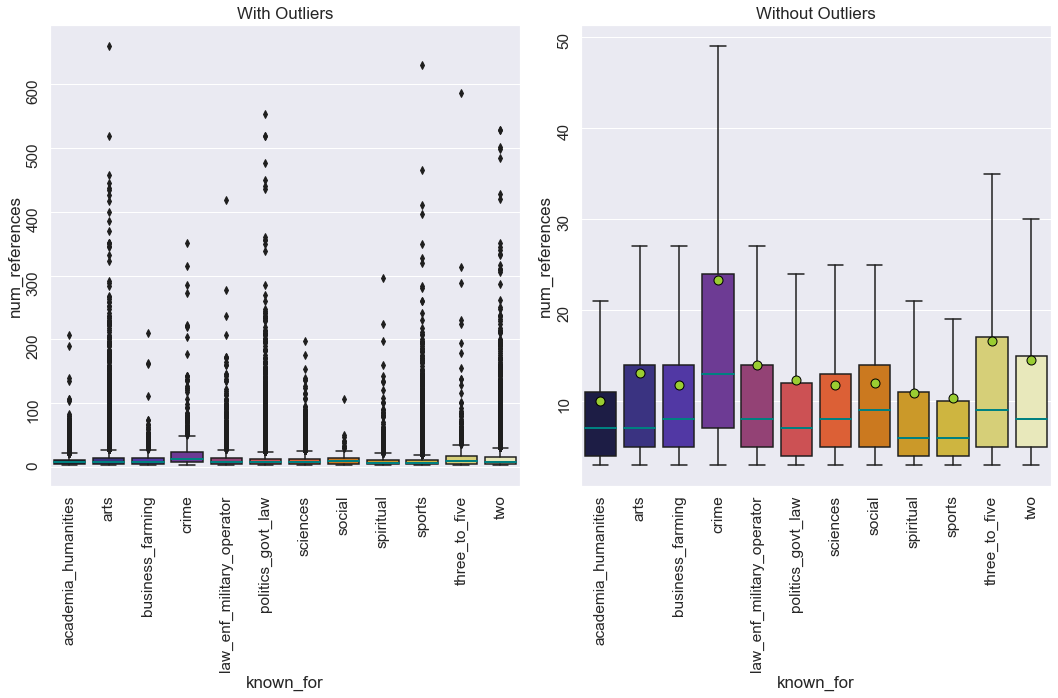

<IPython.core.display.Javascript object>

In [64]:
# Plotting boxplots of known_for vs num_references with and without outliers
box_w_wo_fliers(df, "known_for", "num_references")

#### Observations:
- Here we see clearly the impact of leaving `num_references` untreated as any observable differences between `known_for` categories is dominated by the presence of extreme upper-end outliers.
- Crime entries have the highest mean (\~24) and median (\~14) `num_references`.  This finding likely reflects higher participation by Wikipedia contributors for these individuals, who tend to make broader news.
- Though there is some observable relationship between the two predictors, they do not appear to have a strong relationship, which is beneficial for modeling.

### `known_for` vs `age` (target)

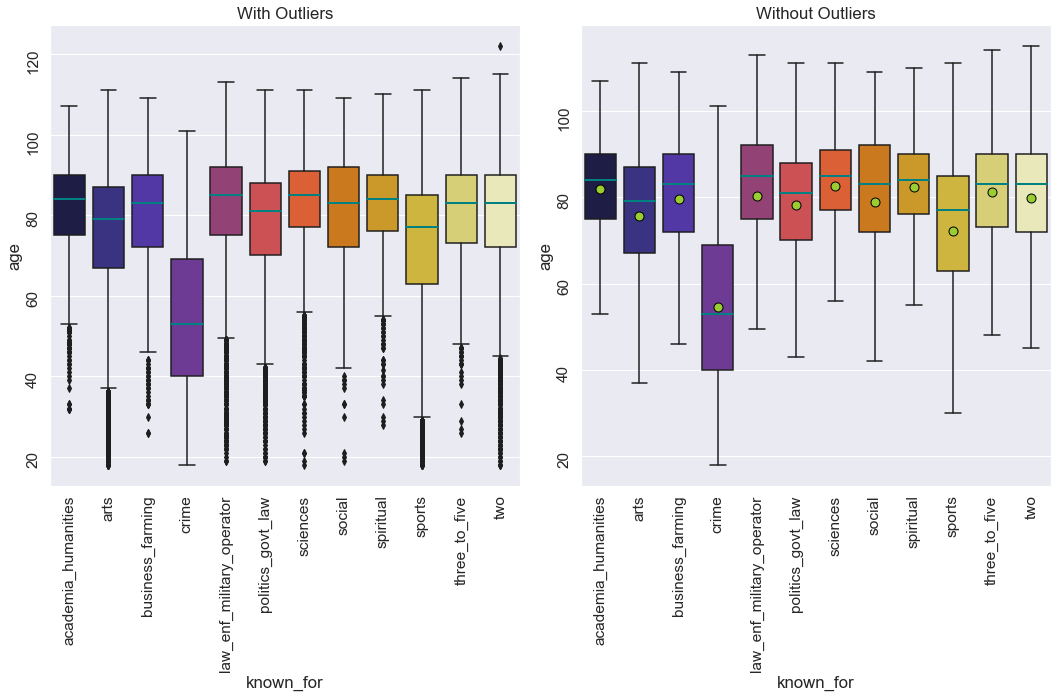

<IPython.core.display.Javascript object>

In [65]:
# Plotting boxplots of known_for vs age with and without outliers
box_w_wo_fliers(df, "known_for", "age")

#### Observations:
- Entries in the crime category have the lowest mean and median (both at ~55 years) `age`, followed by those in sports (\~72 and \~75 years), then arts (\~76 and \~79 years).
- The remaining categories have similar distributions for `age`, with top mean and median `age` of \~83 and \~85 years, respectively.
- The observable variation in `age` between `known_for` categories indicates that `known_for` may offer some limited predictive value for modeling.

### `region` vs `num_references` 

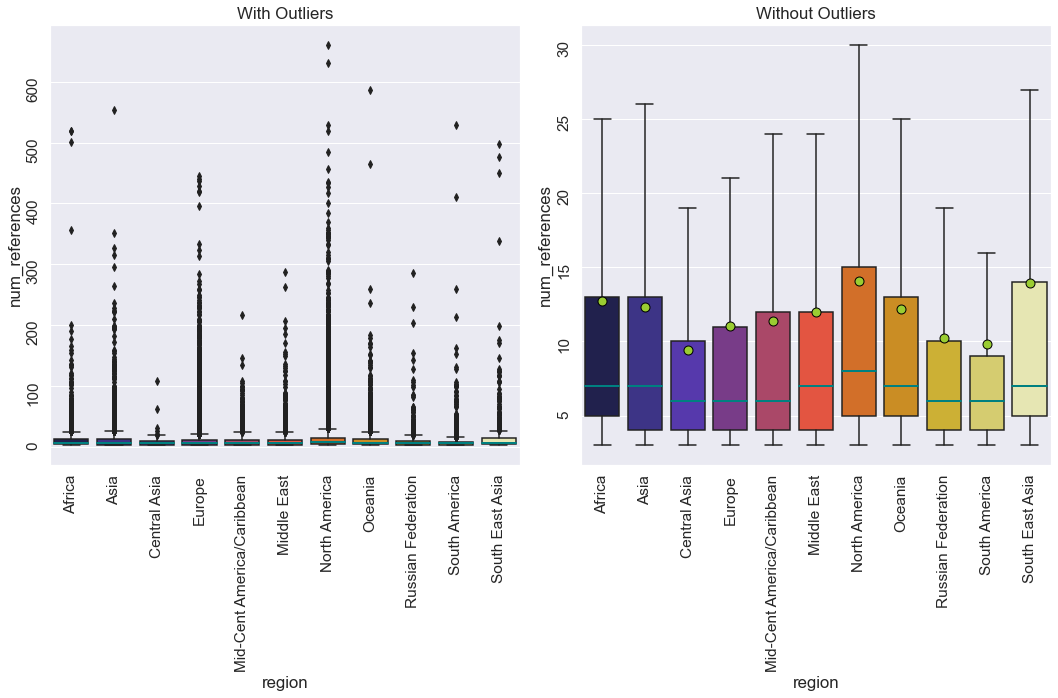

<IPython.core.display.Javascript object>

In [66]:
# Plotting boxplots of region_1 vs num_references with and without outliers
box_w_wo_fliers(df, "region", "num_references")

#### Observations:
- Again we see the impact of extreme outlier presence on `num_references` vs `region`.
- There is mild observable variation for the distribution of `num_references` between the regions.
- North America has the widest spread, which is not surprising, as it also has the most entries.
- A strong relationship does not appear between the two potential predictors, which is beneficial for modeling.

### `region` vs `age` (target)

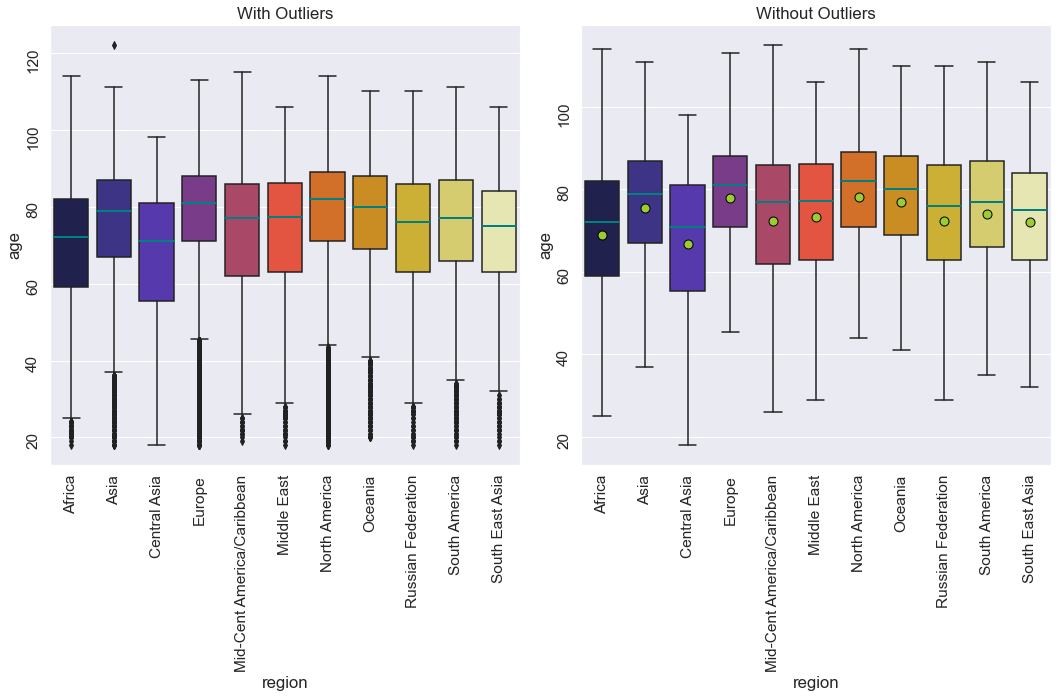

<IPython.core.display.Javascript object>

In [67]:
# Plotting boxplots of region_1 vs age with and without outliers
box_w_wo_fliers(df, "region", "age")

#### Observations:
- Central Asia has the lowest mean and median `age`, at ~66 and ~70 years, followed by AFrica.
- The remaining regions are similar, with the mean and median `age` at ~78 and ~82 years, respectively.
- `region` is not anticipated to be a strong predictor of `age`.

### `prior_region` vs `num_references`

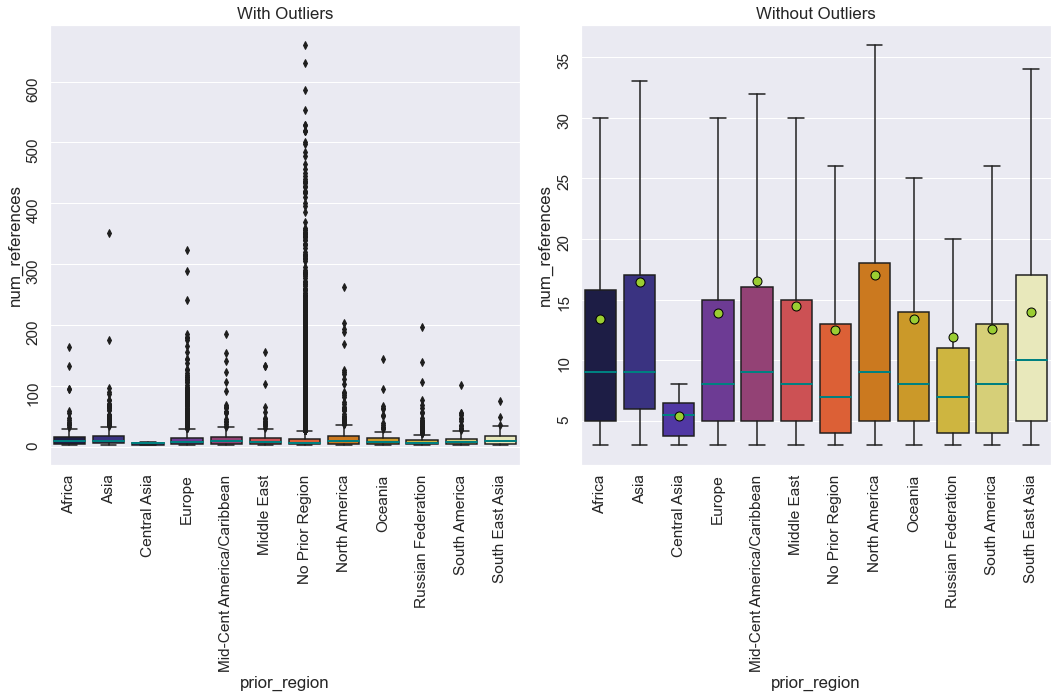

<IPython.core.display.Javascript object>

In [68]:
# Plotting boxplots of region_2 vs num_references with and without outliers
box_w_wo_fliers(df, "prior_region", "num_references")

#### Observations:
- `num_references` does vary somewhat for specific `prior_region` levels, most notably for Central Asia.
- Central Asia has the narrowest spread and lowest mean and median `num_references` at ~5.
- Though there is an observable relationship between the two potential predictors, it does not appear strong, which is beneficial for modeling.

### `prior_region` vs `age` (target)

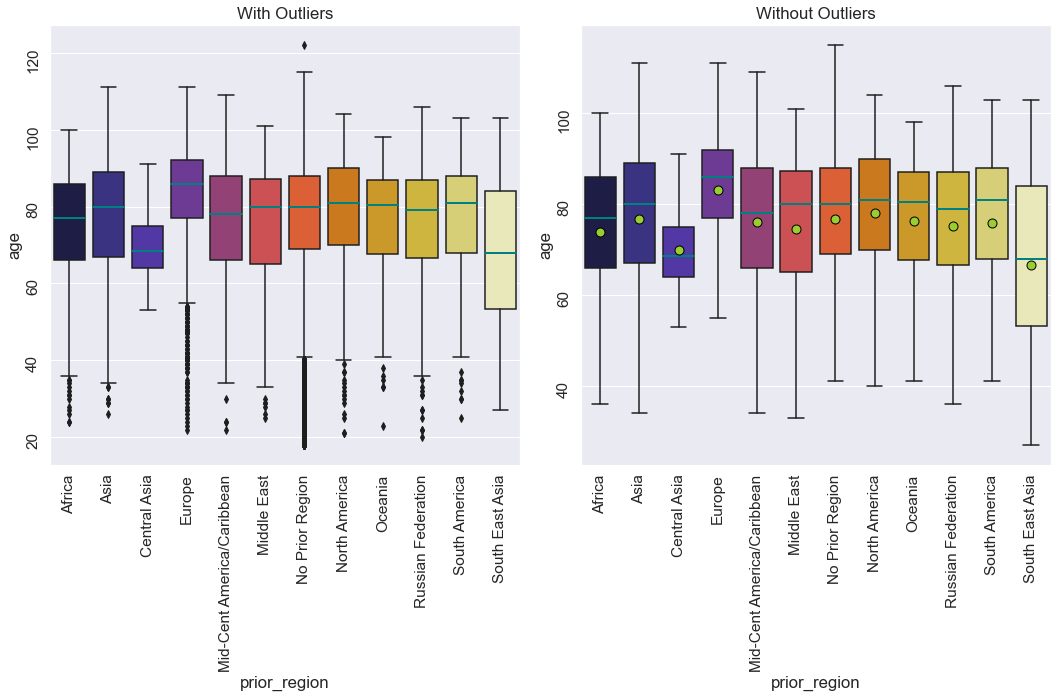

<IPython.core.display.Javascript object>

In [69]:
# Plotting boxplots of region_2_treated vs age with and without outliers
box_w_wo_fliers(df, "prior_region", "age")

#### Observations:
- There is some observable variation for `age` between `prior_region` levels.  
- Europe has the highest mean and median `age`, at ~83 and ~88 years, respectively, while South East Asia has the lowest, both just under 70 years.
- The feature may offer some predictive value but it is not likely to be strong, as the majority of levels have similar `age` distributions.

### `year` vs `age` (target)

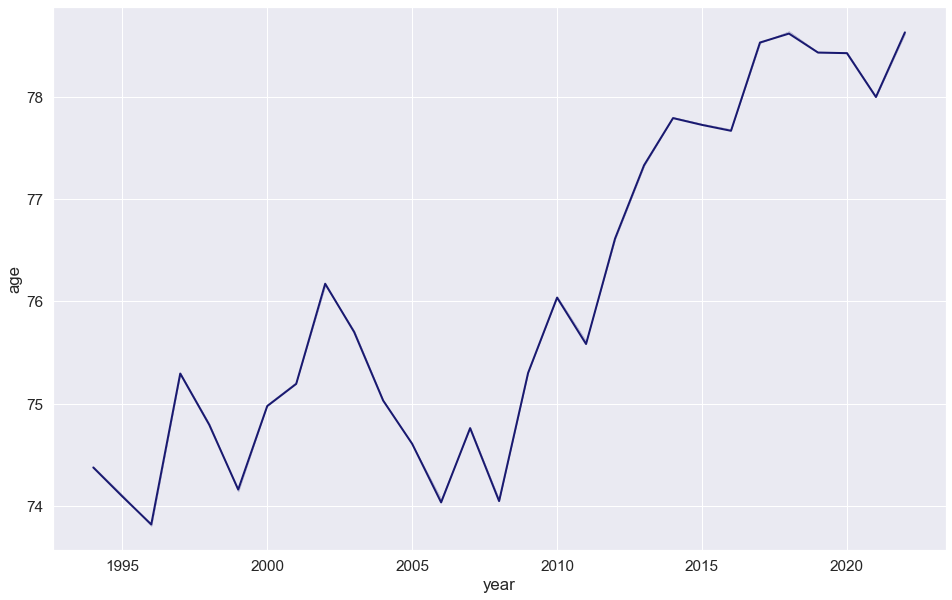

<IPython.core.display.Javascript object>

In [70]:
# Line plot of year vs age
plt.figure(figsize=(16, 10))
sns.lineplot(data=df, x="year", y="age", ci=False, linewidth=2)
plt.show()

#### Observations:
- There is an overall upward trend in mean `age`, with a mid-period peak at 2002 and subsequent dip to 2006-2008.
- The minimimum mean `age` is just under 74 years while the maximum mean `age` is just under 79 years, so the climb is ~5 years during the dataset's time period.
- The trend is likely consistent with increasing life expectancy for the bulk of this period.
- We anticipate `year` to have some predictive value for `age`.

### `year` vs `age` (target) w.r.t. `known_for`

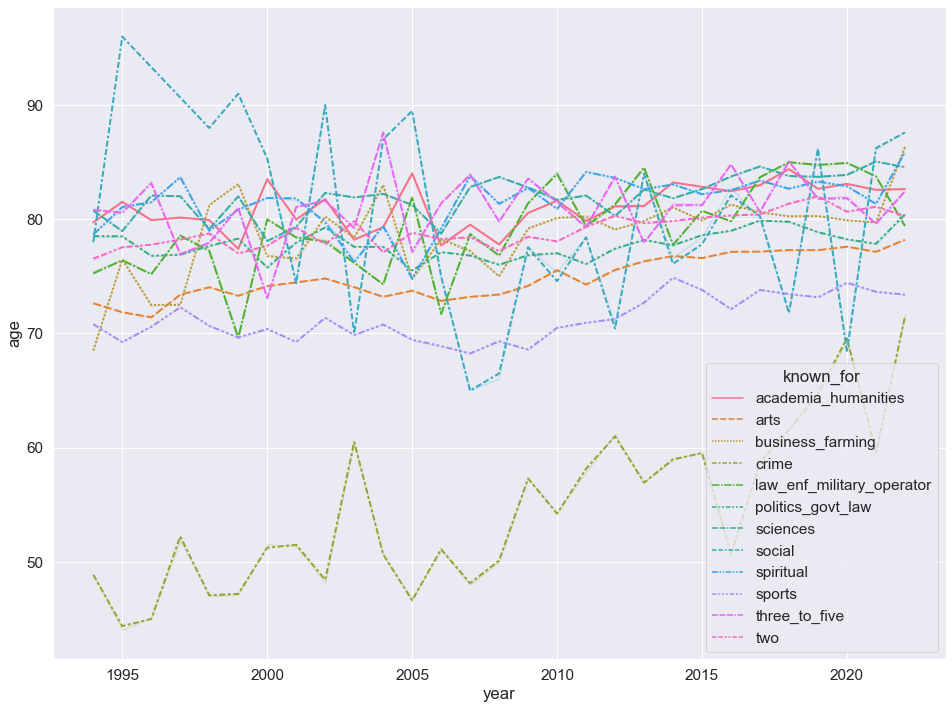

<IPython.core.display.Javascript object>

In [71]:
# Line plot of year vs age w.r.t known_for
plt.figure(figsize=(16, 12))
sns.lineplot(
    data=df,
    x="year",
    y="age",
    ci=False,
    hue="known_for",
    style="known_for",
    linewidth=2,
)
plt.show()

#### Observations:
- With the exception of social, `age` trends upward across `known_for` levels.
- Some separation in the categories is clear, particularly with the mean `age` for crime, sports, and arts, which have the overall lower mean values for `age`.
- In combination, the two predictors are likely to have some predictive value.

### `year` vs `age` (target) w.r.t. `region`

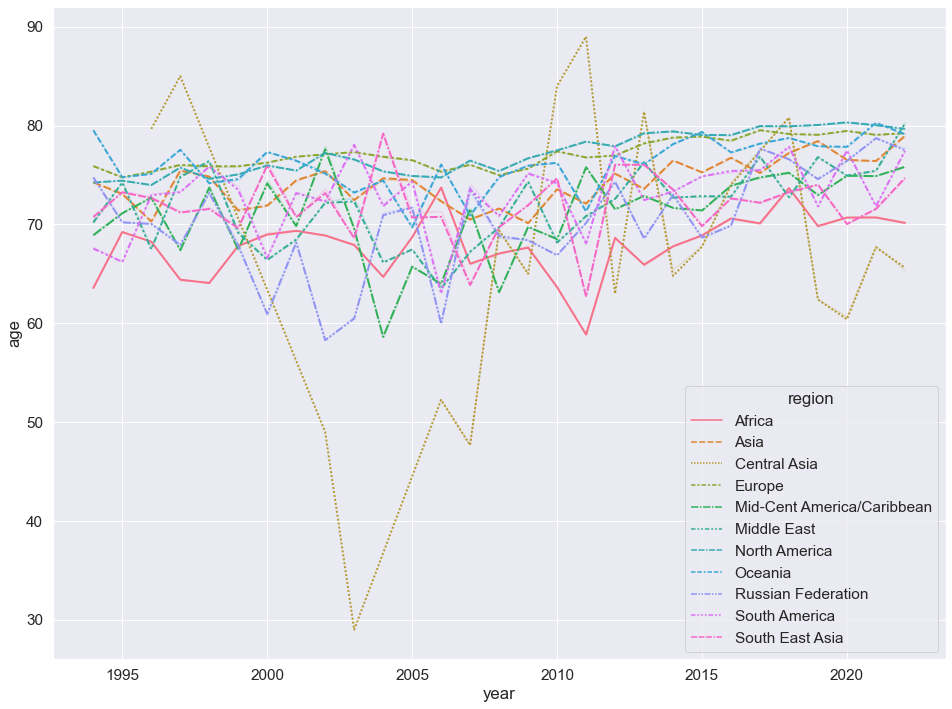

<IPython.core.display.Javascript object>

In [72]:
# Line plot of year vs age w.r.t region
plt.figure(figsize=(16, 12))
sns.lineplot(
    data=df, x="year", y="age", ci=False, hue="region", style="region", linewidth=2,
)
plt.show()

#### Observations:
- The slight overall upward trend is still observable here despite the extreme mean `age` values for Central Asian entries. We will keep in mind that the climb is ~5 years, so less discernable on this plot's scale.
- Again, `region` appears less valuable for prediction than `known_for`.
- Even in combination with `year`, `region` is not likely to be a strong predictor.

### `year` vs `age` (target) w.r.t. `prior_region`

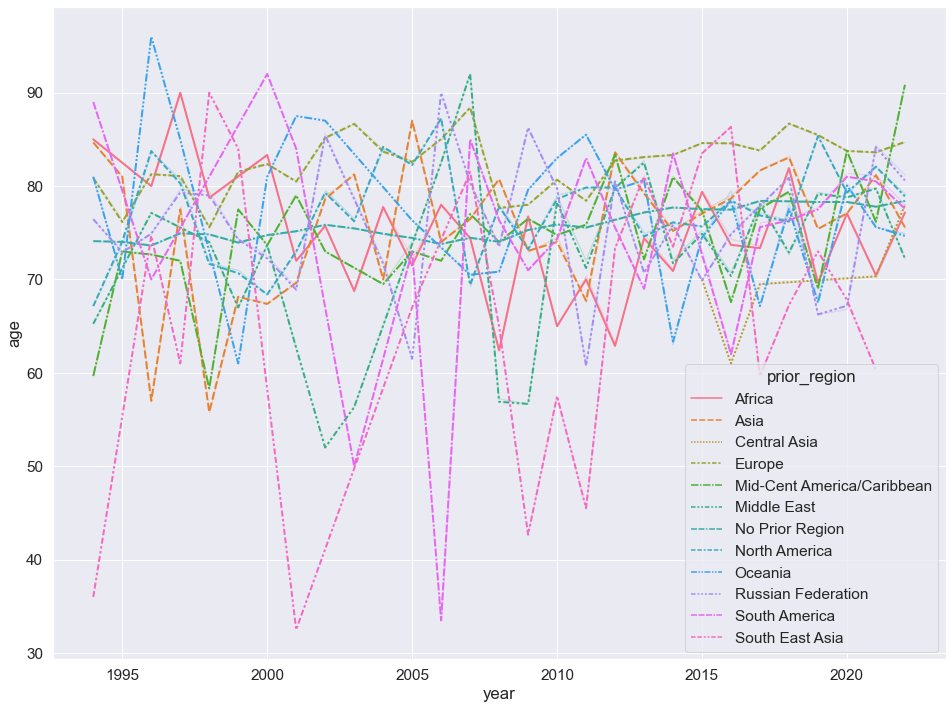

<IPython.core.display.Javascript object>

In [73]:
# Line plot of year vs age w.r.t region_2_treated
plt.figure(figsize=(16, 12))
sns.lineplot(
    data=df,
    x="year",
    y="age",
    ci=False,
    hue="prior_region",
    style="prior_region",
    linewidth=2,
)
plt.show()

#### Observations:
- This plot looks very noisy, indicating it is not providing much information.
- The smooth curve of the No Prior Region category reflects its very high proportion of entries and we can observe its upward trend.
- Even in combination with `year`, `prior_region` does not show predictive traits.

### `month` vs `age` (target)

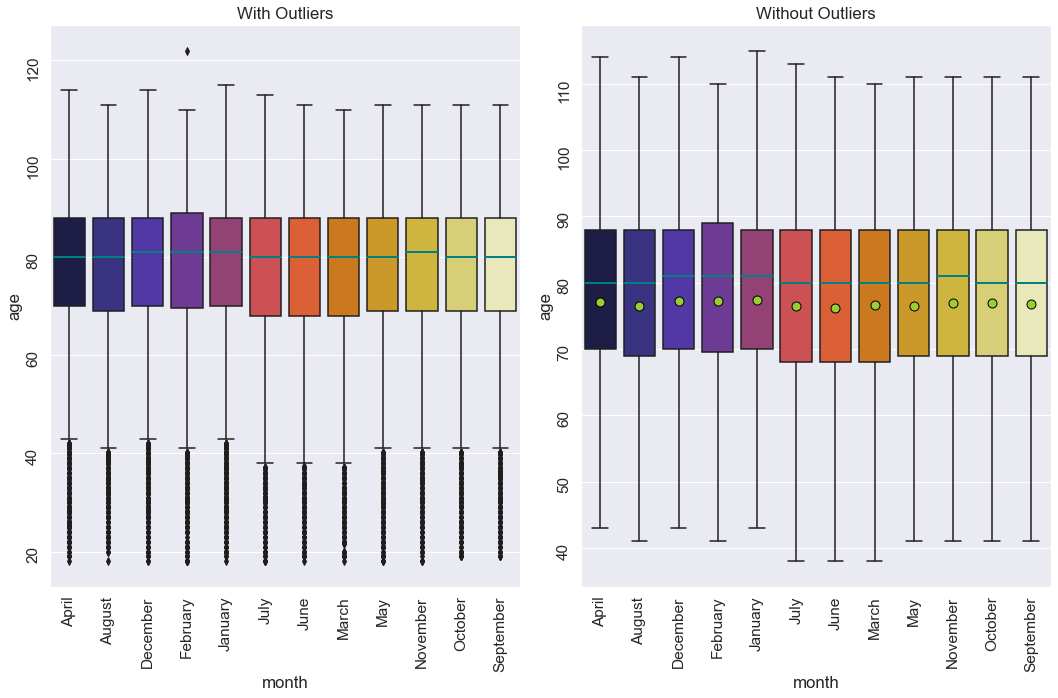

<IPython.core.display.Javascript object>

In [74]:
# Plotting boxplots of region_2 vs age with and without outliers
box_w_wo_fliers(df, "month", "age")

#### Observations:
- Plotted here entirely as a sanity check, `month` of death appears to have no bearing on `age`, as expected.
- We can proceed to drop this feature.

#### Dropping `month`

In [75]:
# Dropping month column
df.drop("month", axis=1, inplace=True)

# Checking a sample
df.sample()

,info,link,num_references,year,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years_sqrd,region,prior_region,known_for
76630,", 96, Russian-born American couturier.",https://en.wikipedia.org/wiki/Irina_Belotelkin,15,2009,None,96.000,None,Russia,United States of America,0,0,0,0,0,1,0,0,0,0,1,9216.000,0.067,225,North America,Russian Federation,arts


<IPython.core.display.Javascript object>

### Crosstab of `known_for` vs `region` Normalized for `known_for` Category

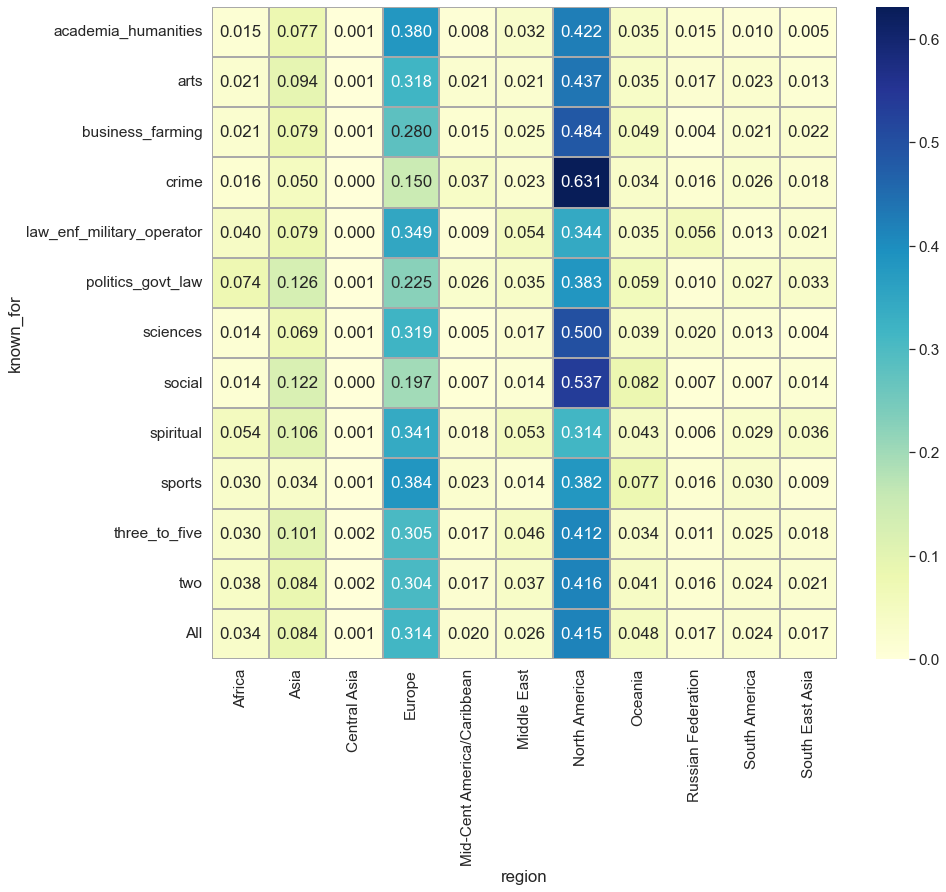

<IPython.core.display.Javascript object>

In [76]:
# Heatmap for crosstab of region vs known_for normalized for all
plt.figure(figsize=(14, 12))
sns.heatmap(
    pd.crosstab(
        index=df["known_for"], columns=df["region"], normalize="index", margins=True
    ),
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linecolor="darkgray",
    linewidth=2,
)
plt.show()

#### Observations:
- Here we see the crosstab of `region` and `known_for` normalized for all values.
- The bottom row is the proportion of the dataset of entries for that region.
- If there was no relationship between the two features, each column would match its bottom row in both value and color.
- We see that in general this is close to the case, but there is some variation.  For example, `crime` and `social` deviate considerably for both Europe and North America, with the categories being less and more likely, for each region, respectively.
- For modeling, it is beneficial that there is not a strong relationship.
- However, we can optimize our treatment of missing values for `region` by leveraging the relationship that is present between the features.

## Summary of EDA

#### Data Description:
-  `name` and `link` are nominal features.
- `day`, `month`,`cause_of_death`, `place_1`, and `place_2` are categorical features.
- `info` and `info_parenth` are of object type and retained for reference only.
- `num_references`, `year` (temporal), `age`, `num_categories` (categorical-like) and `known for` categories (boolean-like) are numeric, of either float or integer type.
- Our target, `age`, has no missing values.  
- `info_parenth`, `place_2`, and `cause_of death` have high percentages of missing values.
- `place_1` has ~1.6% of values missing.

#### Data Handling and Cleaning:
1. `day` and `name` columns were dropped.
1. Non-human entries and `other_species` column were dropped.
1. `month`, `place_1`, and `place_2` were typecast as category.
1. `recip_num_references` column was added (1/`num_references`).
1. `place_2` values duplicating `place_1` were dropped.
1. `region` column was added (ultimate geographic region for all entries with value converted from `place_1` or `place_2`).
1. `prior_region` column was added (first geographic region converted from `place_1` for entries that had relocated, No Prior Region category added for majority that had not relocated).
1. `known_for` column was added (values matching `known for` categories for entries with a single category and additional levels of "two" and "three to five" for entries with the respective `num_categories`).
1. `month` column was dropped after confirming no relationship with `age`.

#### Observations from EDA:  

Univariate
- `age` (target): The mean and median are \~77 and 80 years, respectively, with outliers at both ends spanning as low as 3 months to as high as 134 years.
- `num_references`: The range is from 3 to 660 references, with at least 75% of entries have 13 or fewer references.  Even among this set of notable individuals, there are the exceptionally notable.
- `year`: The dataset contains entries with year of death from 1994 to 2022, inclusive.  2014 divides the dataset in half. 
- `month`: Deaths during all 12 months are represented, with January having the highest number of entries, at \~10%.
- `place_1`: Over 1/3 of entries are from the United States of America, with the United Kingdom having the second highest count.  India, Canada, Australia, France, Germany, Italy, Russia, and New Zealand make up the rest of the top 10 place_1 countries.  The top 10 account for \~68% of entries.
- `place_2`:  The top 10 place_2 countries account for less than 5% of entries, with most entries not having a place_2 value.  The United States of America accounts for the highest number of entries, at \~1750, followed by the United Kingdom, at ~450.
- `region`: Of the 11 regions, North America is the top value, followed by Europe, accounting for \~73% of entries combined. 
- `prior_region`: Over 94% of entries have only one region of residency.  The most relocations came from European countries (3% of entries).
- `num_categories`: The vast majority (\~85%) of entries have only 1 known for category, but there are entries with as many as 5 categories.
- `known_for`: The category arts accounts for just over 1/3 of entries, followed by sports, then politics_govt_law, which combined also account for just over 1/3 of entries, followed by entries with two categories. Academia_humanities and sciences show higher likelihood of occurring in combination with another category than other levels.


Bivariate and Multivariate
-  Correlation: Numerical features are mostly independent of each other, with a few exceptions:       
    - Moderate Positive Correlations:
        - `academia_humanities` and `num_categories`
    - Moderate Negative Correlations:
        - `num_references` and `recip_num_references` (multiplicative inverses)
        - `arts` and `sports`
        - `arts` and `politics_govt_law`
    - Mild Positive Correlation:
        - `business_farming` and `social`
    - Mild Negative Correlation:
        - `sports` and `politics_govt_law`
- `known_for` vs `num_references`: Excluding outliers, crime entries have the highest mean (\~31) and median (\~17) num_references, likely a reflection of their newsworthiness.
- `known_for` vs `age` (target): Entries in the crime category have the lowest mean (\~55-58 years) and median (\~50-51 years), followed by those in sports, then arts.  The remaining categories have similar distributions for age, with science and spiritual having top mean and median age, of \~83 and \~85 years, respectively.
- `region` vs `num_references`: Ecluding outliers, there is some mild variation in distributions for number of references between regions but the two predictors are not strongly related.
- `region` vs `age` (target):  Central Asia and Africa have the lowest mean age, at ~70 years.  Europe, Oceania, and North America having slightly higher mean age for the regions, of ~78 years.
- `prior_region` vs `num_references`:  Excluding lower values for Central Asia, there is not a strong relationship between these two predictors.
- `prior_region` vs `age` (target): Europe has the highest mean age at ~83 years, while South East Asia has the lowest, at ~70 years.  The remaining regions have similar age distributions.
- `year` vs `age` (target): There is an overall upward trend in mean age, with a mid-period peak at 2002 and subsequent dip to 2006-2008.  The net increase in age is between ~5 years, from ~74 to ~79 years.
- `year` vs `age` (target) w.r.t. `known_for`: Some separation in the categories is clear, particularly with mean age for  and crime, sports, and arts, which have the lower mean values for age.
- `year` vs `age` (target) w.r.t. `region`:  Extreme mean age values for Central Asia are apparent, but otherwise the separation between regions is mild for age.
- `year` vs `age` (target) w.r.t. `prior_region`:  Aside from the extreme mean values and the dominant No Prior Region category, it is difficult to distinguish the prior-region levels.
- `month` vs `age` (target): Month of death does not show a relationship with age, as expected.
- `region` vs `known_for` Normalized for `known_for` Category: The relationship between the features is not strong, but it is sufficient to warrant splitting on known for category for region missing value treatment.

#### Actions for Data Pre-processing:
For `train` Set:
1. Drop entries with `event_record_other` as sole category.
1. Treatment for `known for` categories, either one hot encoding `known_for` column, or direct treatment of binary `known for` category columns (i.e., dividing by `num_categories`).
1. Drop unnecessary columns.
1. Outlier detection and treatment, as indicated.
1. Missing value treatment.
1. Revisit EDA.
1. One hot encoding of remaining categorical variables.

For Pipeline (for `test` and Production):
1. Above necessary data handling and cleaning steps.
2. Additional Pre-Processing steps.

#### Observations:
- With initial EDA completed, will now export our `train` and `test` sets and pick back up in a new notebook.
- We will also need a copy of `region_place_dict` for the `test` set and for production.

### Saving `train` and `test` Sets as  [wp_life_expect_train.csv](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_train.csv) and [wp_life_expect_test.csv](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_test.csv)

In [ ]:
# Saving current train set as csv file
df.to_csv("wp_life_expect_train.csv", index=False)

# Saving test as csv file
test.to_csv("wp_life_expect_test.csv", index=False)

#### Saving region_place_dict to a Pickle File [region_place_dict.pkl](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/region_place_dict.pkl)

In [ ]:
# Create a binary pickle file
f = open("region_place_dict.pkl", "wb")

# Write the dictionary to pickle file
pickle.dump(region_place_dict, f)

# close file
f.close()

In [ ]:
print("Complete")

# Chime notification when cell executes
chime.success()

# [Proceed to Data Pre-processing ](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_preproc_thanak_2022_10_06.ipynb)